In [1]:
%matplotlib inline
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from sktime.performance_metrics.forecasting import *

def print_metrics(ref, comp, model_name='Model'):
    mae_ = mean_absolute_error(ref, comp)
    rmse_ = mean_squared_error(ref, comp, square_root = True)
    mape_ = mean_absolute_percentage_error(ref, comp) * 100
    smape_ = mean_absolute_percentage_error(ref, comp, symmetric = True) * 100
    
    dict_ = {'Mean Absolute Error': mae_, 'Root Mean Squared Error': rmse_,
             'Mean Absolute Percentage Error': mape_, 'Mean Squared Absolute Percentage Error': smape_ }
    
    df = pd.DataFrame(dict_, index = [model_name])
    return(df.round(decimals = 3))

In [2]:
df= pd.read_csv('Mekong Can Tho Data.csv')

In [3]:
df

Date   COD    DO          EC    NO3     N2   TSS       TEMP  \
0    2003-01-31  2.94  5.78  131.195447  0.141  0.456  43.0  30.000049   
1    2003-02-28  1.82  6.61  149.295438  0.092  0.780  38.0  28.999728   
2    2003-03-31  1.68  7.19  174.595427  0.072  0.289  34.0  28.999728   
3    2003-04-30  1.71  6.98  172.995428  0.150  0.517  26.8  30.000049   
4    2003-05-31  2.30  7.02  241.995397  0.240  0.669  10.4  29.699952   
..          ...   ...   ...         ...    ...    ...   ...        ...   
223  2021-08-31  3.81  5.24  145.795440  0.648  1.160  15.0  29.199792   
224  2021-09-30  4.09  4.47  281.995379  0.757  3.110  42.0  28.799663   
225  2021-10-31  3.50  5.50  100.895460  0.043  0.605  76.0  28.199471   
226  2021-11-30  3.37  5.29  201.495415  0.232  0.713  56.0  29.799985   
227  2021-12-31  4.10  5.08  160.495433  0.523  0.706  38.0  29.099760   

           PH  
0    7.241053  
1    7.081055  
2    7.191054  
3    7.551047  
4    6.701062  
..        ...  
223  7.201053  
224  6.961058  
225  6.571064  
226  6.471066  
227  7.031056  

[228 rows x 9 columns]

In [15]:
df['EC']=df['EC']*10
#df.to_csv('Mekong Can Tho Data.csv')

In [4]:
df = df.set_index('Date')

In [17]:
df

Unnamed: 0   COD    DO          EC    NO3     N2   TSS       TEMP  \
Date                                                                            
2003-01-31           0  2.94  5.78  131.195447  0.141  0.456  43.0  30.000049   
2003-02-28           1  1.82  6.61  149.295438  0.092  0.780  38.0  28.999728   
2003-03-31           2  1.68  7.19  174.595427  0.072  0.289  34.0  28.999728   
2003-04-30           3  1.71  6.98  172.995428  0.150  0.517  26.8  30.000049   
2003-05-31           4  2.30  7.02  241.995397  0.240  0.669  10.4  29.699952   
...                ...   ...   ...         ...    ...    ...   ...        ...   
2021-08-31         223  3.81  5.24  145.795440  0.648  1.160  15.0  29.199792   
2021-09-30         224  4.09  4.47  281.995379  0.757  3.110  42.0  28.799663   
2021-10-31         225  3.50  5.50  100.895460  0.043  0.605  76.0  28.199471   
2021-11-30         226  3.37  5.29  201.495415  0.232  0.713  56.0  29.799985   
2021-12-31         227  4.10  5.08  160.495433  0.523  0.706  38.0  29.099760   

                  PH  
Date                  
2003-01-31  7.241053  
2003-02-28  7.081055  
2003-03-31  7.191054  
2003-04-30  7.551047  
2003-05-31  6.701062  
...              ...  
2021-08-31  7.201053  
2021-09-30  6.961058  
2021-10-31  6.571064  
2021-11-30  6.471066  
2021-12-31  7.031056  

[228 rows x 9 columns]

In [18]:
df= df.drop(df.columns[0],axis=1)

In [19]:
df= df.convert_dtypes()

In [5]:
df.index=pd.DatetimeIndex(df.index,freq='m')

In [21]:
df

COD    DO          EC    NO3     N2   TSS       TEMP        PH
Date                                                                       
2003-01-31  2.94  5.78  131.195447  0.141  0.456  43.0  30.000049  7.241053
2003-02-28  1.82  6.61  149.295438  0.092   0.78  38.0  28.999728  7.081055
2003-03-31  1.68  7.19  174.595427  0.072  0.289  34.0  28.999728  7.191054
2003-04-30  1.71  6.98  172.995428   0.15  0.517  26.8  30.000049  7.551047
2003-05-31   2.3  7.02  241.995397   0.24  0.669  10.4  29.699952  6.701062
...          ...   ...         ...    ...    ...   ...        ...       ...
2021-08-31  3.81  5.24   145.79544  0.648   1.16  15.0  29.199792  7.201053
2021-09-30  4.09  4.47  281.995379  0.757   3.11  42.0  28.799663  6.961058
2021-10-31   3.5   5.5   100.89546  0.043  0.605  76.0  28.199471  6.571064
2021-11-30  3.37  5.29  201.495415  0.232  0.713  56.0  29.799985  6.471066
2021-12-31   4.1  5.08  160.495433  0.523  0.706  38.0   29.09976  7.031056

[228 rows x 8 columns]

In [5]:
df.index=pd.DatetimeIndex(df.index,freq='M')

In [22]:
df.to_csv('Mekong Can Tho Data.csv')

In [6]:
%matplotlib inline
trans={'COD':"Chemical Oxygen Demand", 'DO': 'Dissolved Oxygen','EC': 'Electrical Conductivity','NO3':'Nitrate',
      'N2': 'Nitrogen','TSS':'Total Suspended Solids','TEMP':'Temperature','PH':'pH','WQI':'Water Quality Index'}
units=dict(zip(trans.keys(),['mg/L','mg/L','μmS/cm','mg/L','mg/L','mg/L','C','pH','WQI']))

In [10]:
fig, axs= plt.subplots(2,4,figsize=(120,50), constrained_layout=True)
fig.suptitle('Mekong Delta Water Indexes In Can Tho (1/2003 - 12/2021)', fontsize=32)
for ax,col in zip(axs.flatten(),df.columns):
    ax.set_xlabel('Year')
    ax.set_title(f'{trans[col]}', size=18)
    ax.set_ylabel(f'{units[col]} ')
    ax.xaxis.set_major_locator(mdates.YearLocator())
#ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=6))
#ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
#ax.xaxis.set_ticks(np.arange(start, end, 0.712123))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('Jun.'))
#ax.axvline( color='k')
#ax.minorticks_on()
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    ax.tick_params(axis='x', labelrotation = 45)
    ax.set_xlim(33*365-14,52*365+1)
    ax.plot(df.index,col,data=df, linewidth=3)


In [11]:
df

COD    DO          EC    NO3     N2   TSS       TEMP        PH
Date                                                                       
2003-01-31  2.94  5.78  131.195447  0.141  0.456  43.0  30.000049  7.241053
2003-02-28  1.82  6.61  149.295438  0.092   0.78  38.0  28.999728  7.081055
2003-03-31  1.68  7.19  174.595427  0.072  0.289  34.0  28.999728  7.191054
2003-04-30  1.71  6.98  172.995428   0.15  0.517  26.8  30.000049  7.551047
2003-05-31   2.3  7.02  241.995397   0.24  0.669  10.4  29.699952  6.701062
...          ...   ...         ...    ...    ...   ...        ...       ...
2021-08-31  3.81  5.24   145.79544  0.648   1.16  15.0  29.199792  7.201053
2021-09-30  4.09  4.47  281.995379  0.757   3.11  42.0  28.799663  6.961058
2021-10-31   3.5   5.5   100.89546  0.043  0.605  76.0  28.199471  6.571064
2021-11-30  3.37  5.29  201.495415  0.232  0.713  56.0  29.799985  6.471066
2021-12-31   4.1  5.08  160.495433  0.523  0.706  38.0   29.09976  7.031056

[228 rows x 8 columns]

In [7]:
sl=dict(zip(trans.keys(),[20,6,1000,20,10,500,28,8.5]))
vl=dict(zip(trans.keys(),[0,14,0,0,0,0,0,7]))
def calc_wqi(r):
    return 100 * sum([1/sl[k] * (r[k]-vl[k])/(sl[k]-vl[k])
                         for k in r.index if k!='WQI'])/sum(map(lambda x:1/x, sl.values()))
#for i,v in list(df.iterrows()):
#    print(calc_wqi(v))
df.insert(0,'WQI',0)
df['WQI']=df.apply(calc_wqi, axis=1)

In [8]:
df

WQI   COD    DO          EC    NO3     N2   TSS       TEMP  \
Date                                                                           
2003-01-31  46.075382  2.94  5.78  131.195447  0.141  0.456  43.0  30.000049   
2003-02-28  40.186446  1.82  6.61  149.295438  0.092  0.780  38.0  28.999728   
2003-03-31  38.512208  1.68  7.19  174.595427  0.072  0.289  34.0  28.999728   
2003-04-30  45.472699  1.71  6.98  172.995428  0.150  0.517  26.8  30.000049   
2003-05-31  33.110415  2.30  7.02  241.995397  0.240  0.669  10.4  29.699952   
...               ...   ...   ...         ...    ...    ...   ...        ...   
2021-08-31  49.416917  3.81  5.24  145.795440  0.648  1.160  15.0  29.199792   
2021-09-30  52.748440  4.09  4.47  281.995379  0.757  3.110  42.0  28.799663   
2021-10-31  37.229829  3.50  5.50  100.895460  0.043  0.605  76.0  28.199471   
2021-11-30  37.195715  3.37  5.29  201.495415  0.232  0.713  56.0  29.799985   
2021-12-31  46.711869  4.10  5.08  160.495433  0.523  0.706  38.0  29.099760   

                  PH  
Date                  
2003-01-31  7.241053  
2003-02-28  7.081055  
2003-03-31  7.191054  
2003-04-30  7.551047  
2003-05-31  6.701062  
...              ...  
2021-08-31  7.201053  
2021-09-30  6.961058  
2021-10-31  6.571064  
2021-11-30  6.471066  
2021-12-31  7.031056  

[228 rows x 9 columns]

In [46]:
df.to_csv('Mekong Can Tho Data.csv')

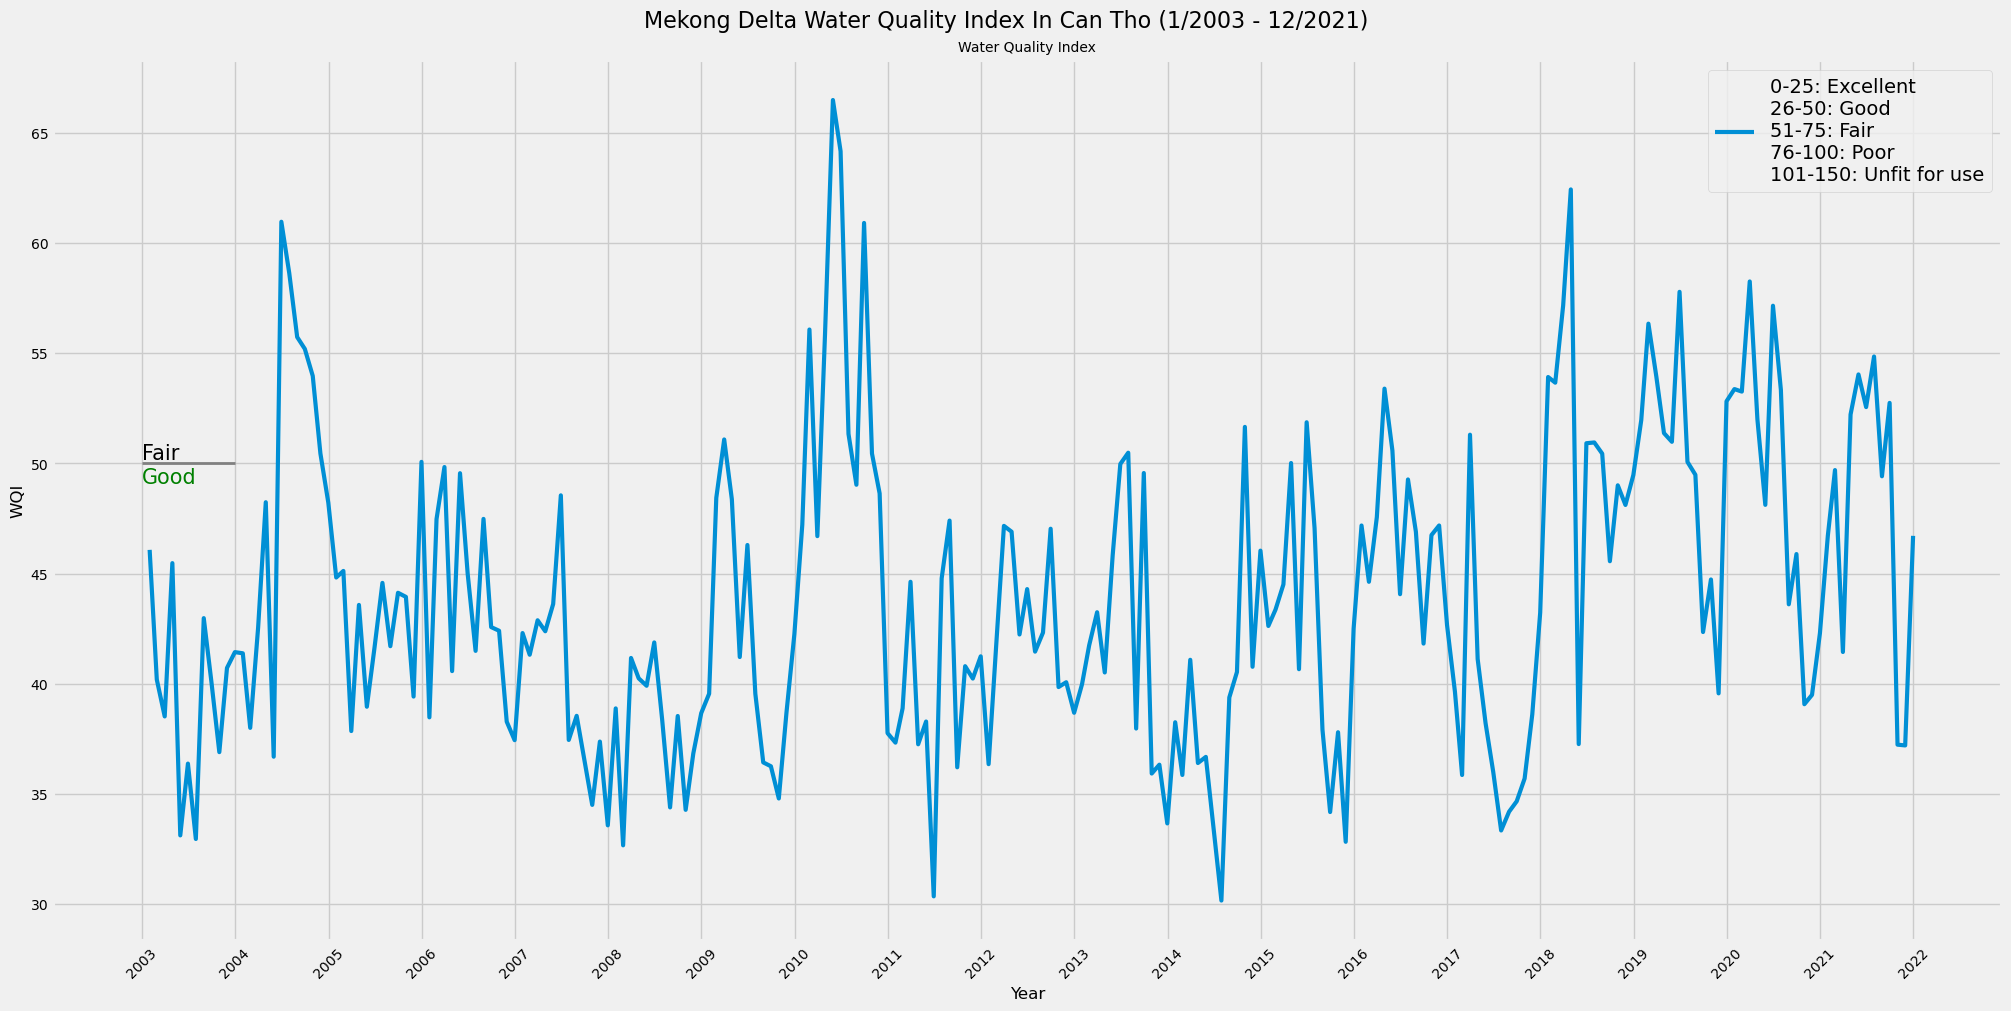

In [15]:
fig, ax= plt.subplots(figsize=(20,10), constrained_layout=True)
fig.suptitle('Mekong Delta Water Quality Index In Can Tho (1/2003 - 12/2021)', fontsize=16)
ax.set_xlabel('Year')
ax.set_title(f"{trans['WQI']}", size=10)
ax.set_ylabel(f"{units['WQI']}")
ax.xaxis.set_major_locator(mdates.YearLocator())
#ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=6))
#ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
#ax.xaxis.set_ticks(np.arange(start, end, 0.712123))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('Jun.'))
#ax.axvline( color='k')
#ax.minorticks_on()
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
ax.tick_params(axis='x', labelrotation = 45)
ax.plot(df.index,'WQI',data=df, linewidth=3)
ax.hlines(y=50, xmin=mdates.datestr2num('2002-12-31'), xmax=mdates.datestr2num('2003-12-31'), linewidth=2, color='grey')
plt.annotate('Fair',
              xy = (mdates.datestr2num('2003-01-01'),50.2),  
              color='Black',
              fontsize = 15,)
plt.annotate('Good',
              xy = (mdates.datestr2num('2003-01-01'),49.1),  
              color='Green',
              fontsize = 15,)
ax.legend(['0-25: Excellent \n26-50: Good \n51-75: Fair \n76-100: Poor \n101-150: Unfit for use'])

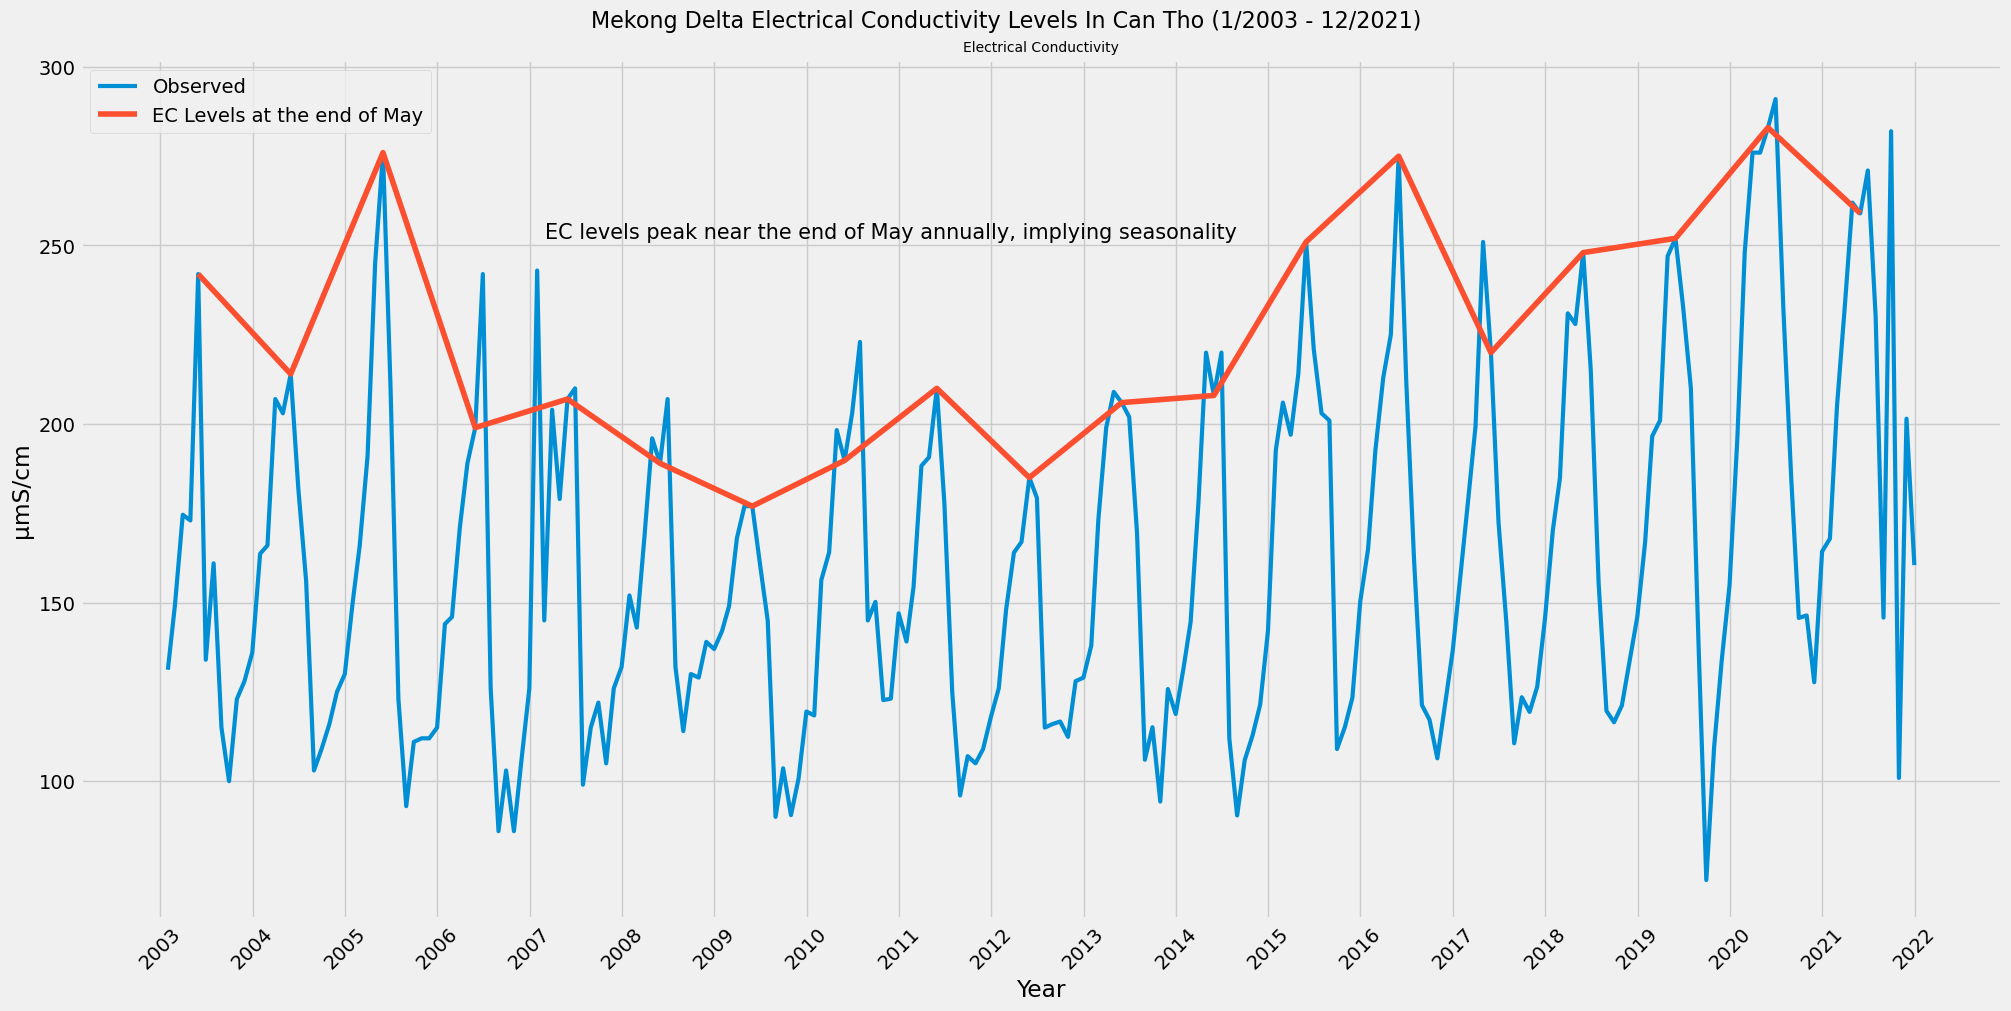

In [74]:
fig, ax= plt.subplots(figsize=(20,10), constrained_layout=True)
fig.suptitle('Mekong Delta Electrical Conductivity Levels In Can Tho (1/2003 - 12/2021)', fontsize=16)
ax.set_xlabel('Year')
ax.set_title(f"{trans['EC']}", size=10)
ax.set_ylabel(f"{units['EC']}")
ax.xaxis.set_major_locator(mdates.YearLocator())
#ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=6))
#ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
#ax.xaxis.set_ticks(np.arange(start, end, 0.712123))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('Jun.'))
#ax.axvline( color='k')
#ax.minorticks_on()
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
ax.tick_params(axis='x', labelrotation = 45)
ax.plot(df.index,'EC',data=df, linewidth=3, label='Observed')
ax.plot(df.loc[df.index.month==5].index,'EC',data=df.loc[df.index.month==5], label='EC Levels at the end of May')
ax.legend()
plt.annotate('EC levels peak near the end of May annually, implying seasonality',
              xy = (mdates.datestr2num('2007-03-01'),252),  
              color='Black',
              fontsize = 15,)
plt.show()

In [54]:
df.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='Date', length=228)

AttributeError: 'Figure' object has no attribute 'set_title'

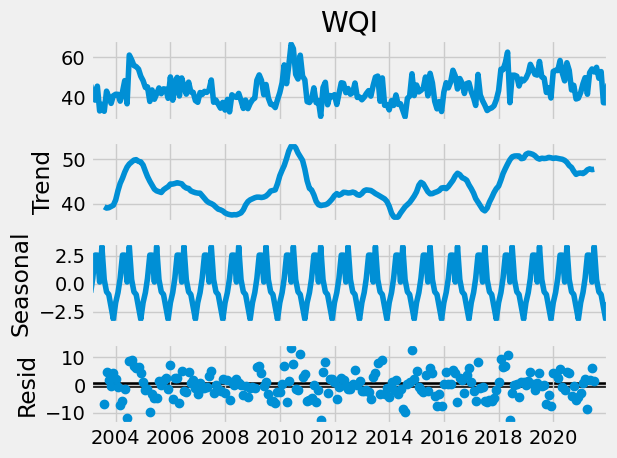

In [29]:
decomposition = sm.tsa.seasonal_decompose(df['WQI'], model='additive')
fig=decomposition.plot()
fig.set_title('Seasonal Decomposition')

In [160]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [161]:
df.index=pd.DatetimeIndex(df.index, freq='infer')

In [162]:
df.index

DatetimeIndex(['2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=228, freq='M')

In [173]:
#Stasmodel.api.tsa.statespace.SARIMAX
startdate='2016-01-31'
vartrain='PH'
train=df.loc[startdate:,vartrain].astype('float')
aicl=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aicl.append((param,param_seasonal, results.aic))
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except e:
            continue
k=min(aicl,key=lambda x:x[2])

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:482.98717953902286
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:351.97699062890223
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:110.3877208389239
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:45.137984054374705
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:113.63868616498996
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:86.45828381925871
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:56.567216496185765
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:55.24649017728727
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:387.5773197643767
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:275.9619073788453
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:97.17902711613874
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:44.01014855726985
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:102.53955076722023
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:101.00794406198048
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:54.0436972830462
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:53.38885752326932
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:68.99926065380178
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:65.08493379135581
ARIM

In [7]:
predf=pd.DataFrame(columns=df.columns)

In [8]:
predf

Empty DataFrame
Columns: [COD, DO, EC, NO3, N2, TSS, TEMP, PH, WQI]
Index: []

In [75]:
#OPTIMIZATION
#Stasmodel.api.tsa.statespace.SARIMAX
p = d = q = range(0, 3)
startdate='2016-01-31'
vartrain='EC'
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
train=df.loc[startdate:,vartrain].astype('float')
aicl=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aicl.append((param,param_seasonal, results.aicc))
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aicc))
        except e:
            continue
k=min(aicl,key=lambda x:x[2])
mod = sm.tsa.statespace.SARIMAX(train,
                                order=k[0],
                                seasonal_order=k[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
#results.plot_diagnostics(figsize=(16, 8))
print()

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:950.5819715092715
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:744.0182736525408
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:577.875500411322
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:591.6012406363344
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:478.98204231847785
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:368.9840204447235
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:507.1162276088153


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:1556.575980250649
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:254.35625257634382
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:601.647574737684
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:588.3115231669918
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:478.6436326616865
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:488.3557205411709
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:481.25733212089995
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:371.4416967316104
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:383.4103629121045


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:1370.678485745023
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:255.11271640229486
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:484.5083389104797
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:486.10591769419347
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:477.3594107273941
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:378.1577153888507
ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:380.50763496571506
ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:373.6473612454075
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:265.84561128769434


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(2, 2, 1, 12)12 - AIC:834.7303785166816
ARIMA(0, 0, 0)x(2, 2, 2, 12)12 - AIC:258.41624383092517
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:861.6140513464194
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:689.5647029245653
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:545.5761068648803
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:583.8412093836728
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:471.4454003429712
ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:361.63634963877826
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:497.848857492687
ARIMA(0, 0, 1)x(0, 2, 1, 12)12 - AIC:1317.8920275490727
ARIMA(0, 0, 1)x(0, 2, 2, 12)12 - AIC:247.14194040546786
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:603.3596033550065
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:581.2071155376615


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:472.238315096476
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:489.96178906265044
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:473.8686139797678
ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:364.3443381862904
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:385.3385059512134


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 2, 1, 12)12 - AIC:1330.567850950876
ARIMA(0, 0, 1)x(1, 2, 2, 12)12 - AIC:248.03883321272806
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:486.8473921886248
ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:488.57898468486826


NameError: name 'e' is not defined

In [76]:
#FITTING
best_models=\
{'COD': ((1, 0, 0), (2, 2, 0, 12)),
 'DO': ((2, 0, 2), (2, 2, 0, 12)),
 'EC': ((1, 2, 2), (0, 2, 2, 12)),
 'NO3': ((1, 0, 0), (1, 0, 1, 12)),
 'N2': ((2, 0, 2), (0, 2, 2, 12)),
 'TSS': ((0, 1, 2), (1, 2, 2, 12)),
 'TEMP': ((0, 1, 2), (0, 2, 2, 12)),
 'PH': ((1, 1, 2), (0, 1, 2, 12))}
#aicl.sort(key=lambda x: x[2])
k= best_models['EC']
mod = sm.tsa.statespace.SARIMAX(train,
                                order=k[0],
                                seasonal_order=k[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
#results.plot_diagnostics()
print()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6560      0.727     -0.902      0.367      -2.082       0.770
ma.L1         -1.2310   3624.514     -0.000      1.000   -7105.148    7102.686
ma.L2          0.2310    837.602      0.000      1.000   -1641.439    1641.901
ma.S.L12      -1.0205   3624.395     -0.000      1.000   -7104.703    7102.662
ma.S.L24       0.0205     74.333      0.000      1.000    -145.669     145.710
sigma2      1975.2821      1.851   1067.369      0.000    1971.655    1978.909



MAE   RMSE  MAPE  SMAPE
EC  35.56  49.32  0.18   0.19

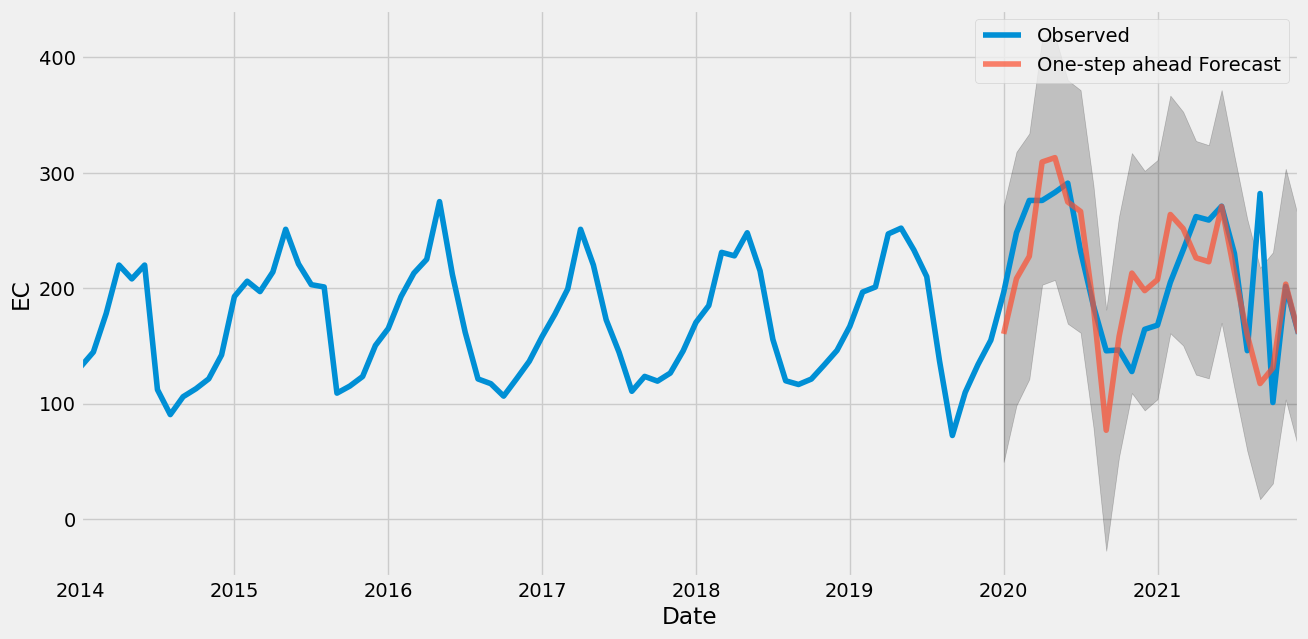

In [77]:
#RESULTS 
spredict='2020-01-31'
pred = results.get_prediction(start=pd.to_datetime(spredict), dynamic=False)
pred_ci = pred.conf_int()
ax = df[vartrain]['2014':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel(vartrain)
plt.legend()
print_metrics(df[spredict:][vartrain],pred.predicted_mean,vartrain)

<Axes: xlabel='Date'>

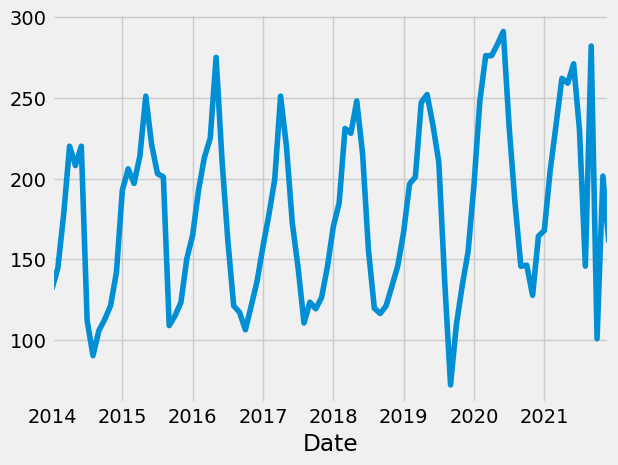

In [49]:
df['EC']['2014':].plot(label='Observed')

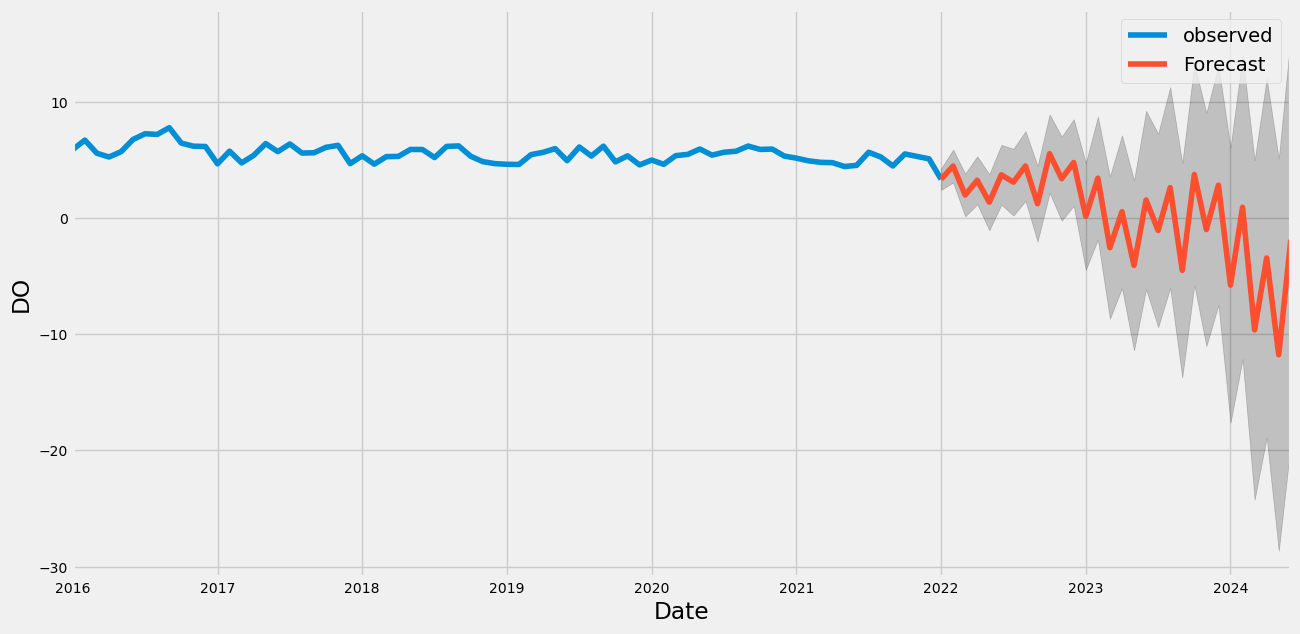

In [58]:
#PREDICTION
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = (df.loc[startdate:][vartrain].append(pred_uc.predicted_mean[0:1])).plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel(vartrain)
plt.legend()
plt.show()
predf[vartrain]=pred_uc.predicted_mean

In [54]:
predf

COD   DO   EC  NO3   N2  TSS TEMP        PH  WQI
2022-01-31   2.813403  NaN  NaN  NaN  NaN  NaN  NaN  7.324877  NaN
2022-02-28   3.977822  NaN  NaN  NaN  NaN  NaN  NaN  7.261604  NaN
2022-03-31   7.433668  NaN  NaN  NaN  NaN  NaN  NaN  7.181971  NaN
2022-04-30   4.392168  NaN  NaN  NaN  NaN  NaN  NaN  7.085168  NaN
2022-05-31   4.158476  NaN  NaN  NaN  NaN  NaN  NaN  7.614687  NaN
2022-06-30   2.977602  NaN  NaN  NaN  NaN  NaN  NaN  7.830832  NaN
2022-07-31   4.601649  NaN  NaN  NaN  NaN  NaN  NaN  7.727922  NaN
2022-08-31   4.125968  NaN  NaN  NaN  NaN  NaN  NaN  6.775723  NaN
2022-09-30   4.077217  NaN  NaN  NaN  NaN  NaN  NaN  7.080932  NaN
2022-10-31   3.495449  NaN  NaN  NaN  NaN  NaN  NaN  6.264501  NaN
2022-11-30   3.593833  NaN  NaN  NaN  NaN  NaN  NaN  6.208637  NaN
2022-12-31   4.735041  NaN  NaN  NaN  NaN  NaN  NaN  6.454929  NaN
2023-01-31   2.937219  NaN  NaN  NaN  NaN  NaN  NaN  6.969833  NaN
2023-02-28   4.245879  NaN  NaN  NaN  NaN  NaN  NaN  7.063827  NaN
2023-03-31   8.867452  NaN  NaN  NaN  NaN  NaN  NaN  6.066058  NaN
2023-04-30   4.564688  NaN  NaN  NaN  NaN  NaN  NaN  6.888890  NaN
2023-05-31   4.207093  NaN  NaN  NaN  NaN  NaN  NaN  7.884618  NaN
2023-06-30   2.468220  NaN  NaN  NaN  NaN  NaN  NaN  7.343002  NaN
2023-07-31   4.807946  NaN  NaN  NaN  NaN  NaN  NaN  8.014805  NaN
2023-08-31   4.054608  NaN  NaN  NaN  NaN  NaN  NaN  6.934620  NaN
2023-09-30   3.922613  NaN  NaN  NaN  NaN  NaN  NaN  7.070905  NaN
2023-10-31   3.273774  NaN  NaN  NaN  NaN  NaN  NaN  6.286816  NaN
2023-11-30   3.233947  NaN  NaN  NaN  NaN  NaN  NaN  6.336790  NaN
2023-12-31   5.019522  NaN  NaN  NaN  NaN  NaN  NaN  6.578513  NaN
2024-01-31   2.680762  NaN  NaN  NaN  NaN  NaN  NaN  7.341951  NaN
2024-02-29   4.133243  NaN  NaN  NaN  NaN  NaN  NaN  7.336000  NaN
2024-03-31  10.077073  NaN  NaN  NaN  NaN  NaN  NaN  6.372580  NaN
2024-04-30   4.654813  NaN  NaN  NaN  NaN  NaN  NaN  6.974367  NaN
2024-05-31   4.191965  NaN  NaN  NaN  NaN  NaN  NaN  8.481107  NaN
2024-06-30   1.951891  NaN  NaN  NaN  NaN  NaN  NaN  7.844166  NaN

In [325]:
#OPTIMIZATION
#Stasmodel.api.tsa.statespace.SARIMAX
warnings.filterwarnings('ignore')
p = d = q = range(0, 3)
startdate='2016-01-31'
enddate='2019-12-31'
pdq = list(itertools.product(p, d, q))
mdict=dict(zip(['COD','DO','EC','NO3','N2','TSS','TEMP','PH'],[[] for i in range(8)]))
#fig, axs=plt.subplots(1,3)
#axs=dict(zip(['COD','DO','EC','NO3','N2','TSS','TEMP','PH'],axs.flatten()))
#axs=dict(zip(['TSS','TEMP','PH'],axs.flatten()))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for vartrain in ['COD','DO','EC','NO3','N2','TSS','TEMP','PH']:
    train=df.loc[startdate:enddate,vartrain].astype('float')
    aicl=[]
    k=None
    print(f'---------------------{vartrain}---------------------')
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(train,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                #b3= sum([param[0]*3**5,param[1]*3**4,param[2]*3**3,param_seasonal[0]*3**2,param_seasonal[1]*3,param_seasonal[2]])
                aicl.append((param,param_seasonal, results.aicc))
                if k==None or results.aic < k[2]:
                    k=(param,param_seasonal,results.aic)
                    print(f'Current Best: ARIMA{k[0]}x{k[1]}12 - AIC:{k[2]}')
                if (b3:=sum([param[0]*3**5,param[1]*3**4,param[2]*3**3,param_seasonal[0]*3**2,param_seasonal[1]*3,param_seasonal[2]]))%100==0:
                    print('Current ',b3)
            except e:
                print('baka')
                continue
    print(f'Best: ARIMA{k[0]}x{k[1]}12 - AIC:{k[2]}')
    mdict[vartrain]=sorted(aicl,key=lambda x:x[2])
plt.show()

---------------------COD---------------------
Current Best: ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:262.10645117161687
Current  0
Current Best: ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:119.17216880289155
Current Best: ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:113.77395249938957
Current Best: ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:74.21125514715706
Current Best: ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:20.503736383427903
Current Best: ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
Current  100
Current  200
Current  300
Current  400
Current  500
Current  600
Current  700
Best: ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
---------------------DO---------------------
Current Best: ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:299.1693554178137
Current  0
Current Best: ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:129.40304198208696
Current Best: ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:88.16033477580339
Current Best: ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:49.08967165320552
Current Best: ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:20.75527495648384

In [55]:
mdict

{'COD': [((1, 0, 0), (2, 2, 0, 12), 64.98185939177296),
  ((0, 0, 0), (0, 2, 2, 12), 65.39626702873508),
  ((1, 0, 2), (0, 2, 2, 12), 65.90055159478325),
  ((0, 0, 0), (2, 2, 0, 12), 66.71390979706099),
  ((0, 0, 0), (1, 2, 2, 12), 66.77326921039173),
  ((2, 0, 0), (2, 2, 0, 12), 66.84325549028165),
  ((0, 0, 1), (0, 2, 2, 12), 66.9326894023843),
  ((0, 1, 1), (0, 2, 2, 12), 67.32139335511523),
  ((0, 0, 1), (1, 2, 2, 12), 67.92939608353612),
  ((2, 0, 2), (0, 2, 2, 12), 68.23859234503546),
  ((1, 0, 1), (2, 2, 0, 12), 68.27645805005945),
  ((1, 0, 0), (0, 2, 2, 12), 68.353320007534),
  ((0, 0, 2), (0, 2, 2, 12), 68.37358206426092),
  ((0, 1, 2), (0, 2, 2, 12), 69.34030445652493),
  ((1, 1, 0), (2, 2, 0, 12), 69.35703621319217),
  ((1, 0, 1), (0, 2, 2, 12), 69.45425612315182),
  ((0, 0, 1), (2, 2, 0, 12), 69.57894878332802),
  ((0, 2, 2), (0, 2, 2, 12), 69.6780629217644),
  ((0, 0, 0), (2, 2, 2, 12), 69.68075059299044),
  ((2, 1, 0), (2, 2, 0, 12), 69.90336716732018),
  ((1, 0, 0), (1,

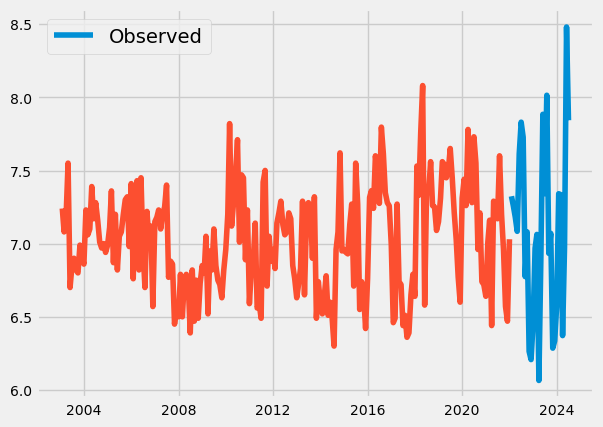

In [62]:
fig,ax=plt.subplots()
ax.plot(predf['PH'],label='Observed')
ax.plot(df['PH'])
ax.legend()

In [326]:
mdict

{'COD': [((0, 0, 1), (0, 1, 2, 12), 23.450312553645652),
  ((0, 0, 0), (0, 1, 2, 12), 23.93230781199933),
  ((1, 0, 0), (2, 1, 0, 12), 29.011648977167294),
  ((1, 0, 0), (0, 1, 2, 12), 29.04607124062647),
  ((0, 0, 0), (1, 1, 2, 12), 29.16133256002434),
  ((0, 1, 1), (0, 1, 2, 12), 29.772554685135823),
  ((0, 0, 0), (2, 1, 0, 12), 31.047447322156263),
  ((2, 0, 0), (2, 1, 0, 12), 31.44550687997073),
  ((0, 0, 1), (1, 1, 2, 12), 31.458797953395873),
  ((1, 0, 1), (0, 1, 2, 12), 32.394134229050636),
  ((0, 1, 0), (0, 1, 2, 12), 34.19299650421377),
  ((0, 0, 1), (2, 1, 0, 12), 34.40024147218996),
  ((1, 0, 1), (2, 1, 0, 12), 34.47477183354832),
  ((0, 1, 0), (2, 1, 0, 12), 34.95754751655627),
  ((0, 0, 0), (2, 1, 1, 12), 35.76237736565904),
  ((1, 0, 0), (2, 1, 1, 12), 36.162230101475615),
  ((1, 0, 0), (1, 1, 2, 12), 36.34498217456866),
  ((2, 0, 0), (0, 1, 2, 12), 36.374301150745964),
  ((0, 0, 0), (2, 1, 2, 12), 36.49455082294605),
  ((0, 0, 2), (0, 1, 2, 12), 36.916987544088954),
  ((

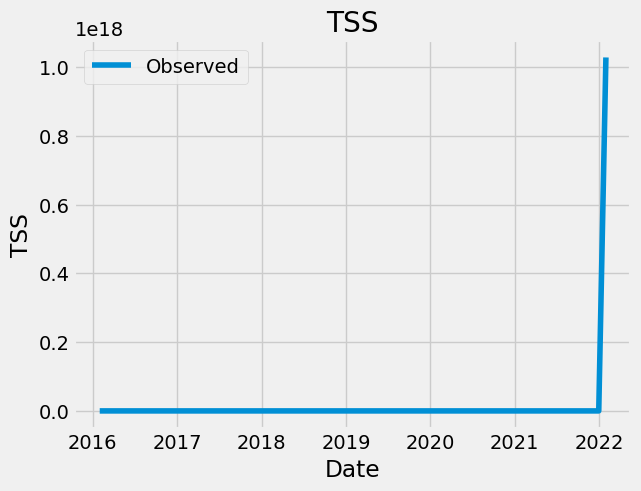

In [138]:
fig,ax=plt.subplots()
vartrain='TSS'
ax.plot(df.loc[startdate:][vartrain].append(predf[vartrain][0:1]),label='Observed')
#predf[vartrain].plot(ax=ax, label='Forecast')
    #ax.fill_between(pred_ci.index,
 #               pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel(vartrain)
ax.set_title(vartrain)
ax.legend()


In [80]:
vartrain='PH'
spredict='2020-01-31'
startdate='2016'
train=df.loc[startdate:,vartrain].astype('float')
indexr=list(range(0,10))
modlist= pd.Series([sm.tsa.statespace.SARIMAX(train,
                                order=best[0],
                                seasonal_order=best[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False) for best in pd.Series(mdict[vartrain])[indexr]])
#print(modlist)
modlist=modlist.apply(lambda k:k.fit())
for i,result in zip(indexr,modlist):
    fig, ax=plt.subplots()

    pred = result.get_prediction(start=pd.to_datetime(spredict), dynamic=False)
    pred_ci = pred.conf_int()
    pred.predicted_mean.plot(ax=ax, label=f'{vartrain}{i} Validation', alpha=.7, figsize=(14, 7),linewidth=2)
    #ax.fill_between(pred_ci.index.,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
    
    print(print_metrics(df[spredict:][vartrain],pred.predicted_mean,vartrain+str(i)))
    
    
    fc= result.get_forecast(steps=24)
    fc_ci=fc.conf_int()
    fc.predicted_mean.plot(ax=ax, label=f'{vartrain}{i} 2 Year-forecast',linewidth=2)
    
    ax.fill_between(pred_ci.index.append(fc_ci.index),
                    pred_ci.iloc[:, 0].append(fc_ci.iloc[:, 0]),
                    pred_ci.iloc[:,1].append(fc_ci.iloc[:, 1]), color='k', alpha=.1)
        
    df[vartrain]['2020':].append(fc.predicted_mean[0:1]).plot(ax=ax,label='Observed',linewidth=3)
    ax.set_ylabel(vartrain)
    ax.set_xlabel('Date')
    #print(pred.predicted_mean)
    ax.legend()
    plt.show()

TypeError: object of type 'int' has no len()

In [26]:
__models= pd.read_csv('modelssplit.csv')
__models=__models.convert_dtypes()
__models=__models.drop(__models.columns[0],axis=1)
print(__models.tail().iloc[0][0])
#__models=__models.drop(__models.columns[0],axis=1)
__models=__models.apply(lambda k: k.apply(lambda x: x.replace('inf','20000')).apply(eval))
mdict=__models

((2, 2, 2), (2, 1, 1, 12), inf)


In [33]:
fcSplitDf=pd.DataFrame(columns=df.columns)
fcSplitDfLower=pd.DataFrame(columns=df.columns)
fcSplitDfUpper=pd.DataFrame(columns=df.columns)

2.288


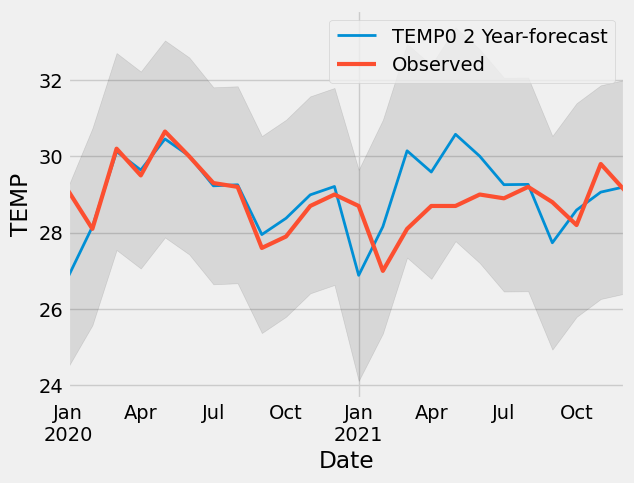

2.27


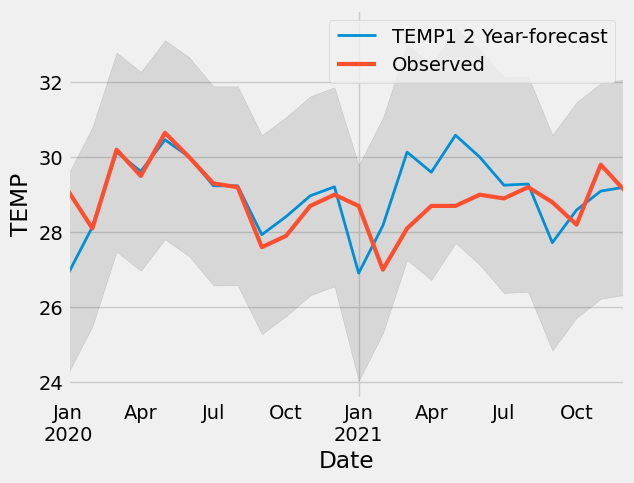

2.228


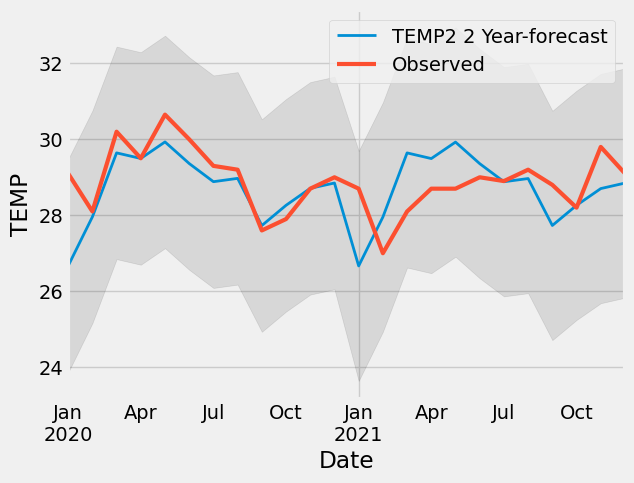

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5.781


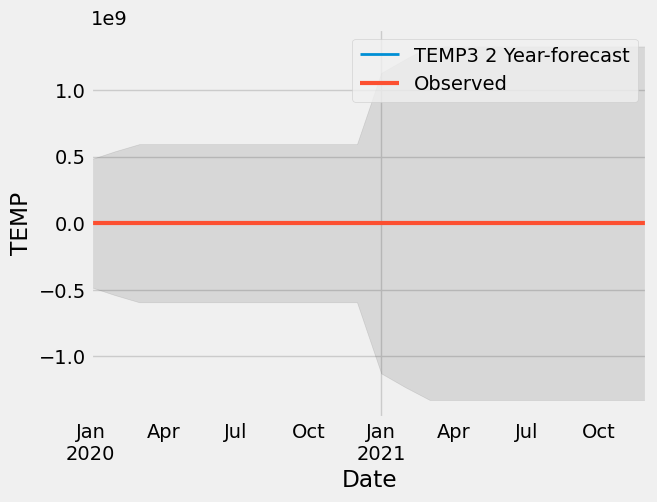

2.534


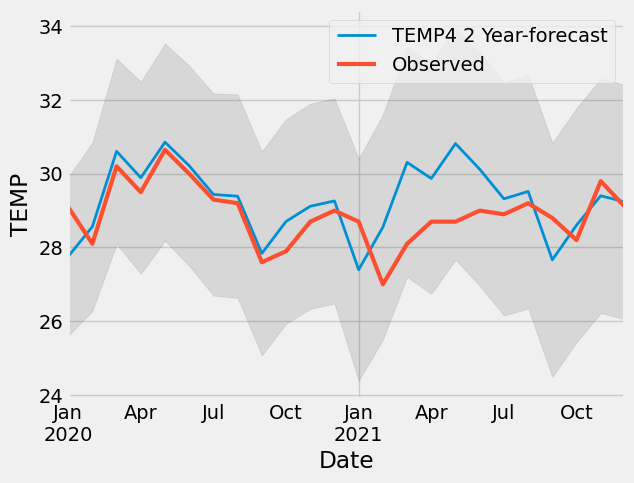

2.25


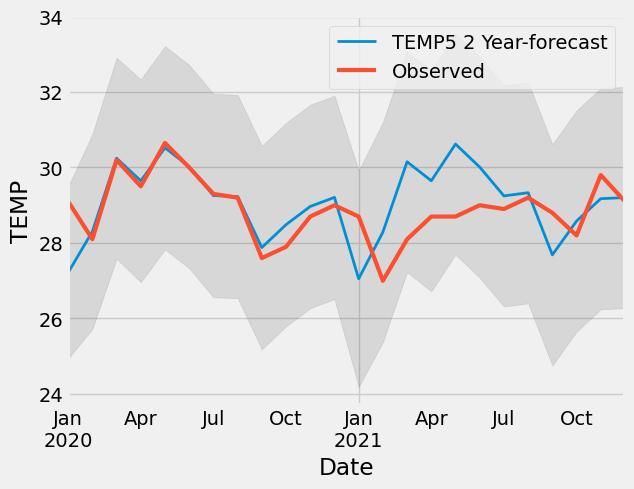

2.362


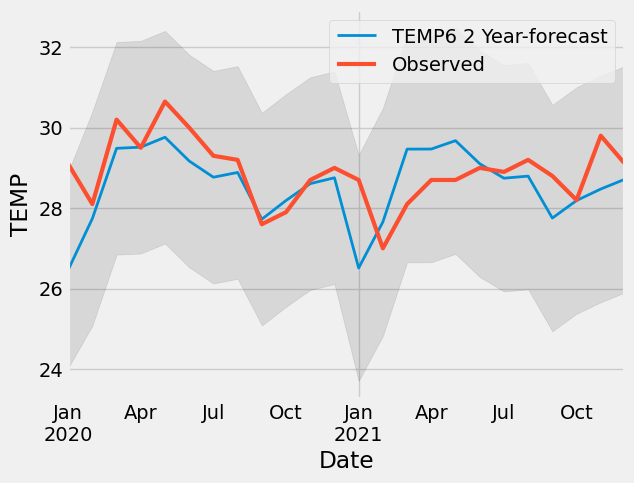

2.851


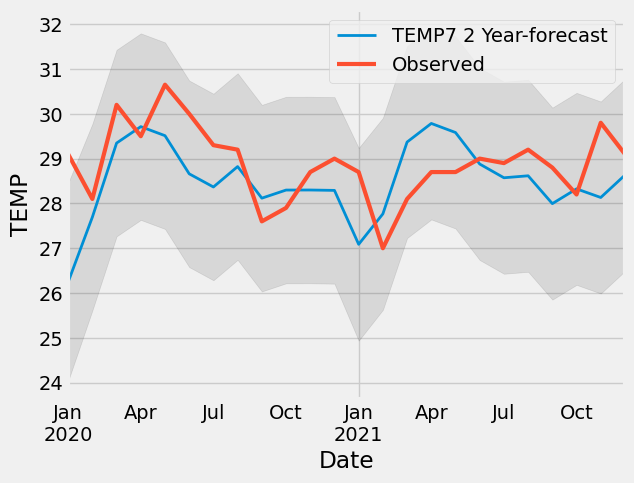

2.94


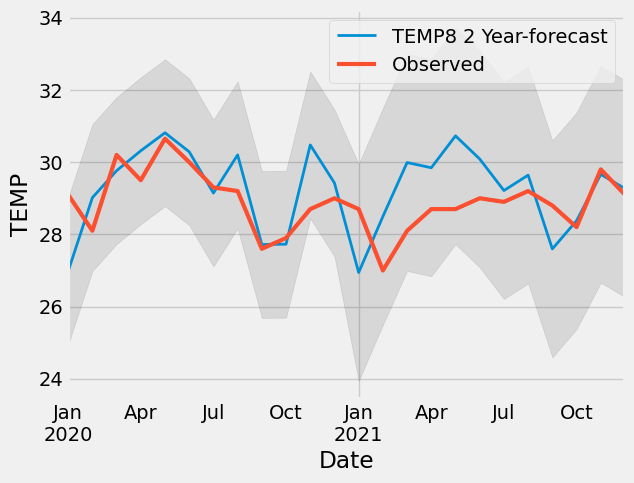

3.741


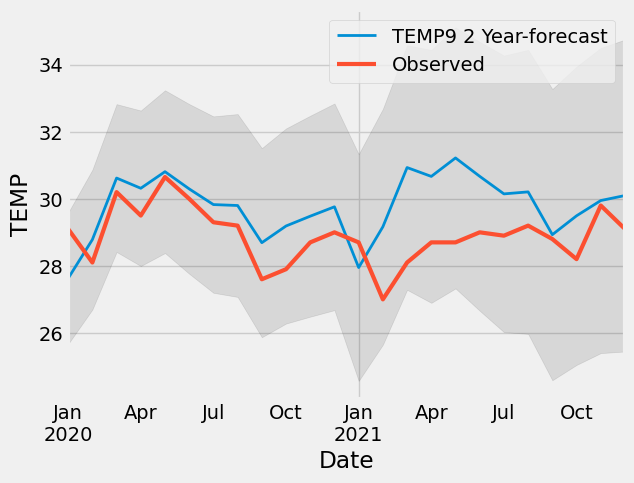

2.743


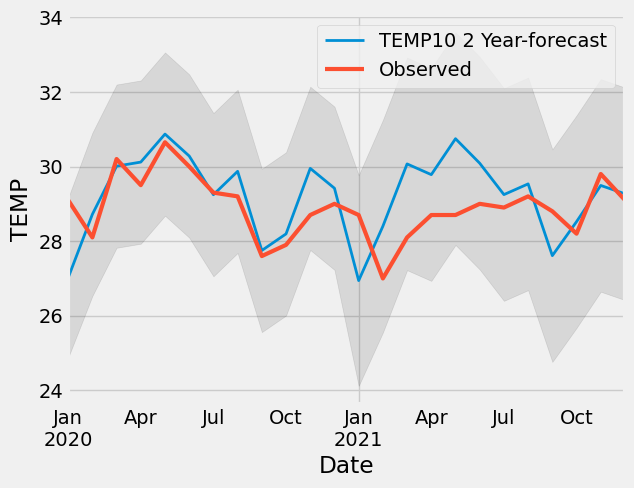

2.239


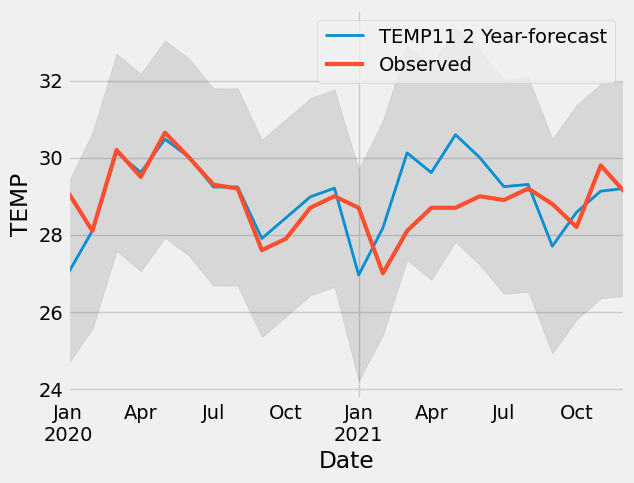

2.108


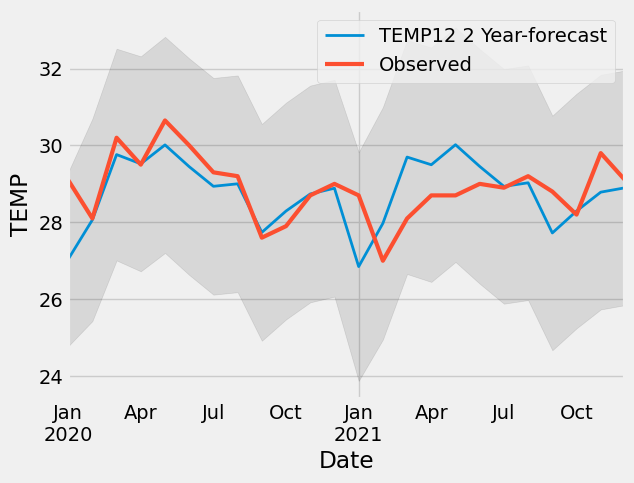

3.356


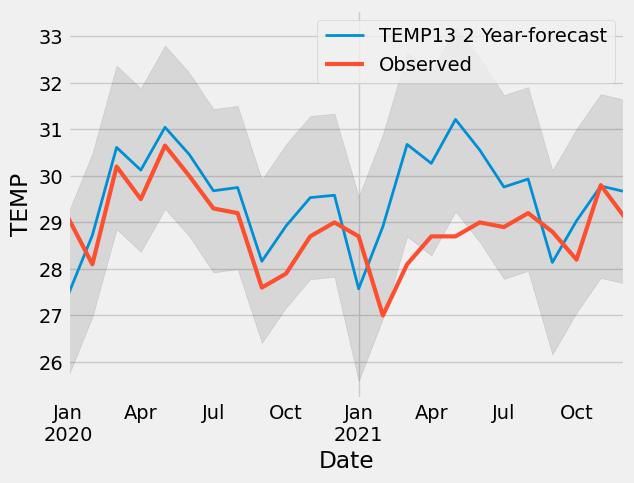

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6.3


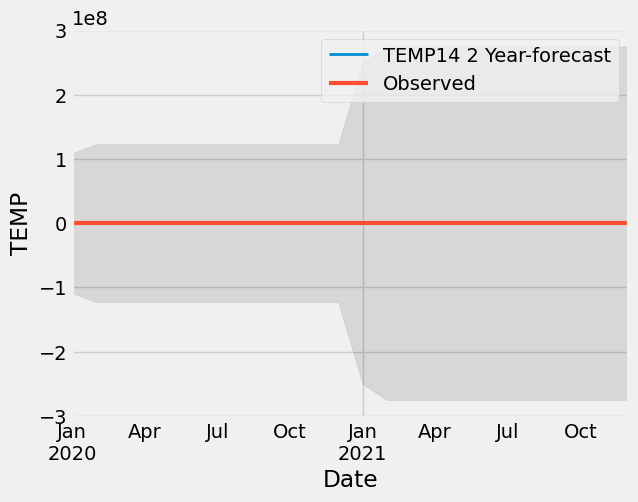

5.233


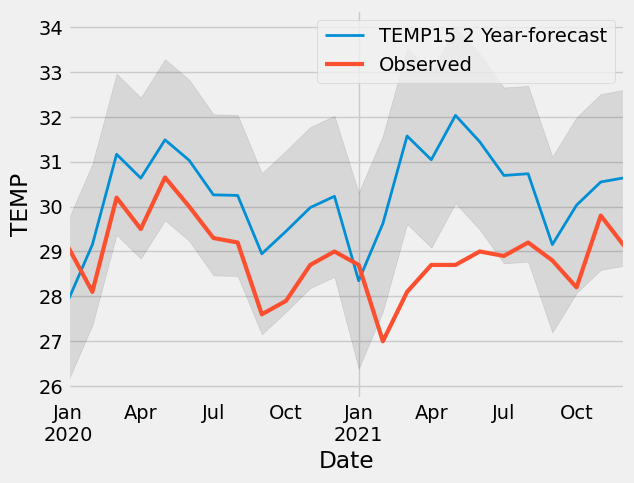

4.039


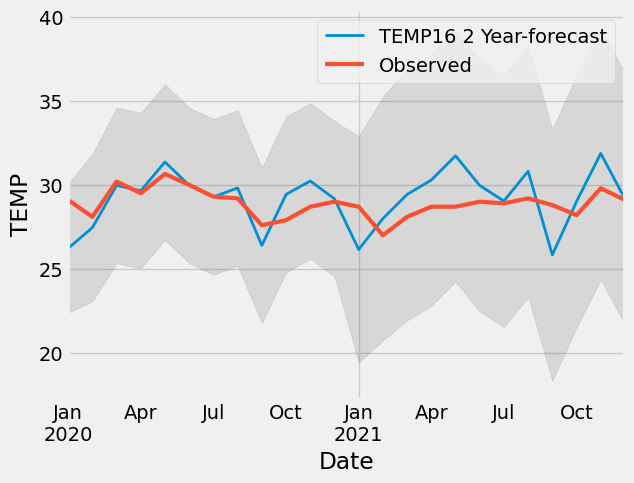

3.391


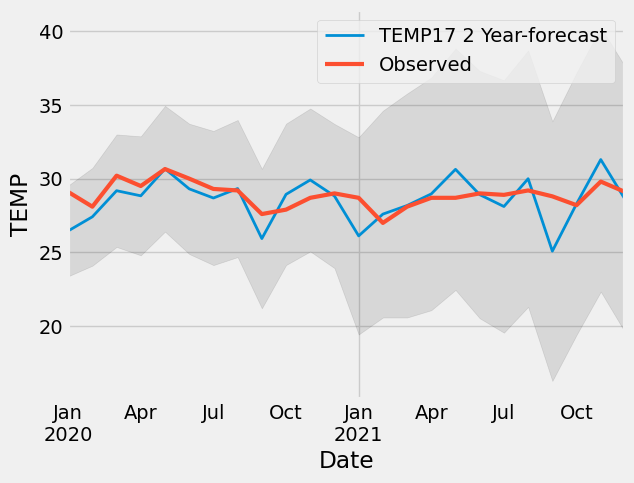

4.527


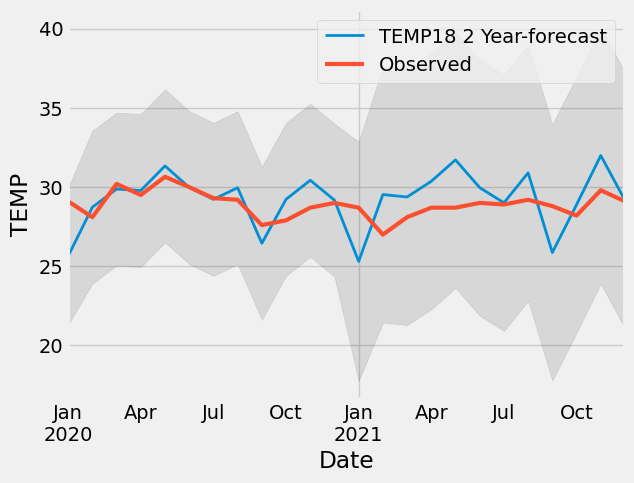

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5.346


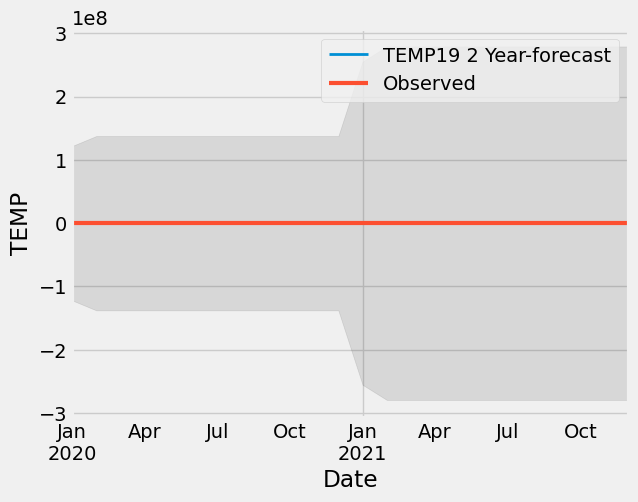

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6.009


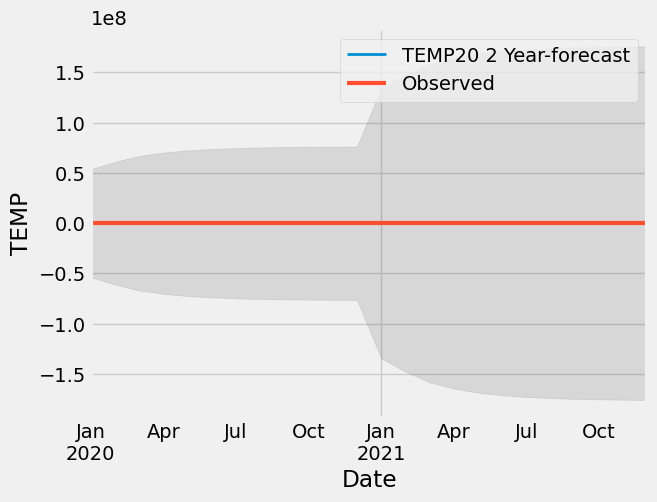

2.506


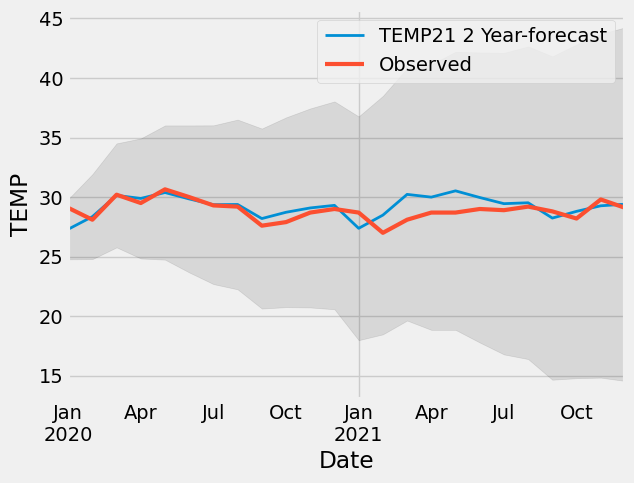

7.061


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


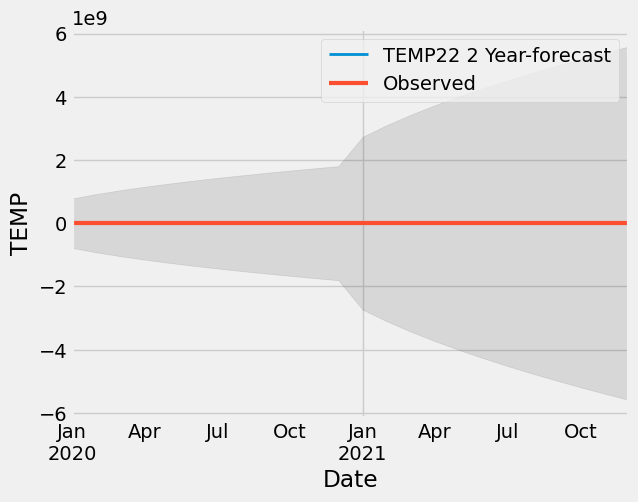

2.812


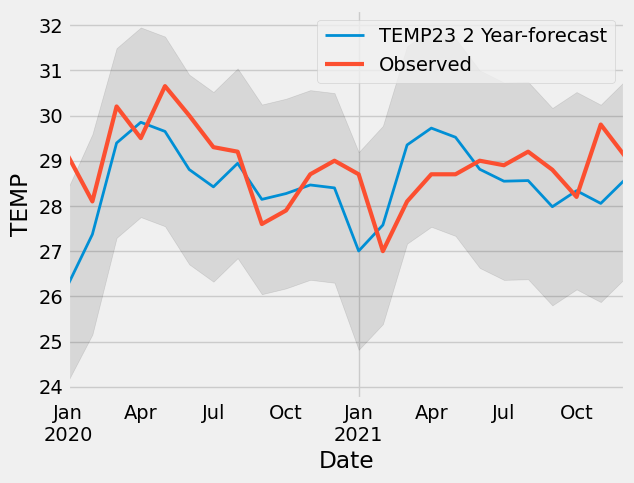

7.284


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


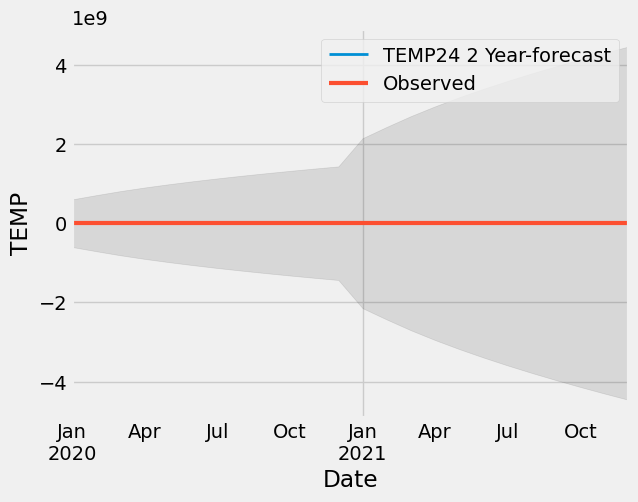

Best Mape:  2.108


In [86]:
#Train and test split trains from 2016-2019 and forecasts 2 years into the future
vartrain='TEMP'
spredict='2020-01-31'
startdate='2014'
enddate='2019-12-31'
train=df.loc[startdate:enddate,vartrain].astype('float')
indexr=list(range(0,25))
modlist= pd.Series([sm.tsa.statespace.SARIMAX(train,
                                order=best[0],
                                seasonal_order=best[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False) for best in pd.Series(mdict[vartrain])[indexr]])
aicl=[]
#print(modlist)
#modlist=modlist.apply(lambda k:k.fit())
for i,mod in zip(indexr,modlist):
    fig, ax=plt.subplots()
    result=mod.fit()
    
    #ax.fill_between(pred_ci.index.,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
    
    fc= result.get_forecast(steps=24)
    fc_ci=fc.conf_int()
    fc.predicted_mean.plot(ax=ax, label=f'{vartrain}{i} 2 Year-forecast',linewidth=2)
    
    print((metrics:=print_metrics(df[vartrain]['2020':],fc.predicted_mean,vartrain))['Mean Absolute Percentage Error'][0])
    aicl.append((fc.predicted_mean,fc_ci.iloc[:,0],fc_ci.iloc[:,1],metrics['Mean Absolute Percentage Error'][0]))
    ax.fill_between(fc_ci.index,
                    fc_ci.iloc[:, 0],
                    fc_ci.iloc[:,1], color='k', alpha=.1)
        
    df[vartrain]['2020':].plot(ax=ax,label='Observed',linewidth=3)
    ax.set_ylabel(vartrain)
    ax.set_xlabel('Date')
    #print(pred.predicted_mean)
    ax.legend()
    plt.show()
aicl.sort(key=lambda x: x[-1])
fcSplitDf[vartrain]=aicl[0][0]
fcSplitDfLower[vartrain]=aicl[0][1]
fcSplitDfUpper[vartrain]=aicl[0][2]
print('Best Mape: ',aicl[0][-1])



In [92]:
fcSplitDf

WQI       COD        DO          EC       NO3        N2  \
2020-01-31  52.106487  3.691505  4.837596  174.813914  0.409687  0.862432   
2020-02-29  55.276241  4.436594  4.693405  206.007882  0.408042  0.894080   
2020-03-31  54.375075  4.179049  5.341101  201.438043  0.377031  0.938458   
2020-04-30  52.771699  3.636438  5.529399  260.016924  0.360514  0.879206   
2020-05-31  48.011084  4.266577  5.975186  251.840985  0.339314  0.971913   
2020-06-30  54.343415  4.184137  5.228538  246.780620  0.321688  0.830755   
2020-07-31  49.393872  3.967985  5.884882  233.872901  0.303960  0.972505   
2020-08-31  48.353679  4.045759  5.554685  146.336544  0.287650  0.932427   
2020-09-30  43.062175  4.476309  6.131053   56.720039  0.272024  0.957794   
2020-10-31  44.150925  3.671290  5.040832  111.041127  0.257330  0.948369   
2020-11-30  41.352139  4.536429  5.280405  138.821435  0.243393  0.948265   
2020-12-31  52.137439  3.751654  4.596950  161.677381  0.230227  0.932372   
2021-01-31  52.134339  3.749080  4.817646  180.289088  0.217766  0.917669   
2021-02-28  55.339818  4.350365  4.682229  212.651780  0.205983  0.944691   
2021-03-31  54.071387  4.166065  5.351343  198.786844  0.194836  0.873413   
2021-04-30  52.621774  3.657314  5.539144  269.619368  0.184292  0.901832   
2021-05-31  47.990249  4.234521  5.972586  247.942235  0.174319  0.908618   
2021-06-30  54.598811  4.217333  5.201177  256.496238  0.164886  0.886407   
2021-07-31  49.072502  3.950381  5.901386  253.355531  0.155963  0.850694   
2021-08-31  48.246962  4.048749  5.534939  151.257526  0.147523  0.879001   
2021-09-30  42.850439  4.444917  6.136016   36.099228  0.139540  0.908312   
2021-10-31  43.947889  3.739791  5.019035  107.116163  0.131989  0.852166   
2021-11-30  41.192852  4.531112  5.282328  138.151530  0.124847  0.942593   
2021-12-31  52.201645  3.775718  4.593620  162.438174  0.118091  0.952316   

                  TSS       TEMP        PH  
2020-01-31  24.785488  27.036344  7.357149  
2020-02-29  42.654609  28.063054  7.484488  
2020-03-31  31.592163  29.762063  7.572969  
2020-04-30  34.185237  29.521163  7.544478  
2020-05-31  28.184001  30.013959  7.306590  
2020-06-30  32.304557  29.447015  7.560801  
2020-07-31  38.833480  28.936064  7.402600  
2020-08-31  45.120249  29.001330  7.248410  
2020-09-30  62.206271  27.737379  7.053004  
2020-10-31  21.650336  28.293017  6.855689  
2020-11-30  32.504483  28.737228  6.697435  
2020-12-31  26.624480  28.886183  7.260168  
2021-01-31  19.947241  26.846752  7.354207  
2021-02-28  37.060507  27.972630  7.490167  
2021-03-31  26.010228  29.697065  7.571328  
2021-04-30  30.413063  29.497287  7.539594  
2021-05-31  23.991345  30.018725  7.319047  
2021-06-30  27.236832  29.453207  7.567443  
2021-07-31  32.693129  28.934026  7.406460  
2021-08-31  39.351407  29.027866  7.247031  
2021-09-30  60.401951  27.722191  7.052337  
2021-10-31  16.917159  28.292687  6.850734  
2021-11-30  28.179955  28.784142  6.691461  
2021-12-31  21.512954  28.897264  7.263900

      Mean Absolute Error  Root Mean Squared Error  \
WQI1                 4.35                    5.351   

      Mean Absolute Percentage Error  Mean Squared Absolute Percentage Error  
WQI1                           9.432                                   9.101  


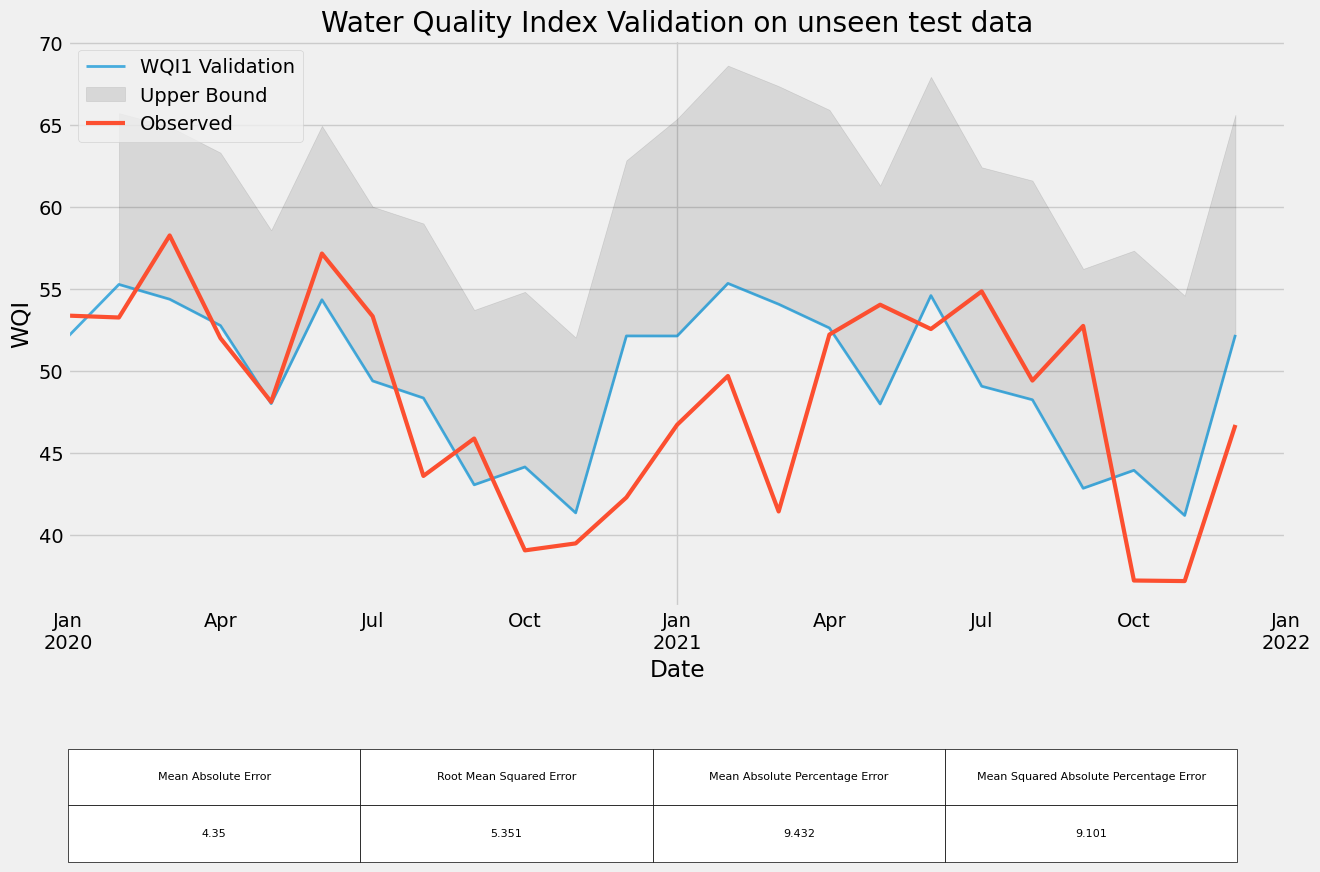

In [96]:
vartrain='WQI'
spredict='2020-01-31'
startdate='2016'
#train=df.loc[startdate:,vartrain].astype('float')
#print(modlist)
#best=best_models[vartrain]
#result=sm.tsa.statespace.SARIMAX(train,
#                                order=best[0],
#                                seasonal_order=best[1],
#                                enforce_stationarity=False,
#                                enforce_invertibility=False).fit()
fig, ax=plt.subplots(constrained_layout=False)

i=1
pred = fcSplitDf
pred_ci = fcSplitDfUpper
pred[vartrain][:'2022'].plot(ax=ax, label=f'{vartrain}{i} Validation', alpha=.7, figsize=(14, 7),linewidth=2)
#ax.fill_between(pred_ci.index.,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
    
metrics= print_metrics(df[spredict:]['WQI'],pred[:'2021']['WQI'],vartrain+str(i))
print(metrics)
table = ax.table(cellText=metrics.values, colWidths = [0.3]*len(metrics.columns),colLabels=metrics.columns, loc='bottom', rowLoc='center',cellLoc='center',  bbox=[0, -0.45, .96, 0.2], )    
table.scale(3,2)  


    
ax.fill_between(pred.index[1:],pred['WQI'][1:],pred_ci['WQI'][1:], color='k', alpha=.1, label='Upper Bound')
        
df[vartrain][spredict:].plot(ax=ax,label='Observed',linewidth=3)
ax.set_ylabel(units[vartrain])
ax.set_xlabel('Date')
ax.set_xlim(spredict,'2022-01-01')
ax.set_title(f'{trans[vartrain]} Validation on unseen test data')
#print(pred.predicted_mean)
ax.legend(loc='upper left')
plt.show()

In [91]:
fcSplitDfLower['WQI']=fcSplitDfLower.apply(calc_wqi,axis=1)

In [32]:
sorted(aicl,key=lambda x: x[1])

[(<statsmodels.tsa.statespace.sarimax.SARIMAX at 0x131f4010590>, 3.43),
 (<statsmodels.tsa.statespace.sarimax.SARIMAX at 0x131f3fea950>, 3.557),
 (<statsmodels.tsa.statespace.sarimax.SARIMAX at 0x131f3fc4a50>, 4.451),
 (<statsmodels.tsa.statespace.sarimax.SARIMAX at 0x131f4010c90>, 4.494),
 (<statsmodels.tsa.statespace.sarimax.SARIMAX at 0x131f3fda910>, 4.614),
 (<statsmodels.tsa.statespace.sarimax.SARIMAX at 0x131f436e950>, 4.635),
 (<statsmodels.tsa.statespace.sarimax.SARIMAX at 0x131f42e4f10>, 4.671),
 (<statsmodels.tsa.statespace.sarimax.SARIMAX at 0x131f42e6b50>, 4.815),
 (<statsmodels.tsa.statespace.sarimax.SARIMAX at 0x131f3fea250>, 4.86),
 (<statsmodels.tsa.statespace.sarimax.SARIMAX at 0x131f42c9650>, 5.391),
 (<statsmodels.tsa.statespace.sarimax.SARIMAX at 0x131f4013410>, 5.399),
 (<statsmodels.tsa.statespace.sarimax.SARIMAX at 0x131f42e6650>, 5.445),
 (<statsmodels.tsa.statespace.sarimax.SARIMAX at 0x131f4010190>, 5.453),
 (<statsmodels.tsa.statespace.sarimax.SARIMAX at 0x13

     Mean Absolute Error  Root Mean Squared Error  \
EC1               35.564                   49.315   

     Mean Absolute Percentage Error  Mean Squared Absolute Percentage Error  
EC1                          17.964                                  18.558  


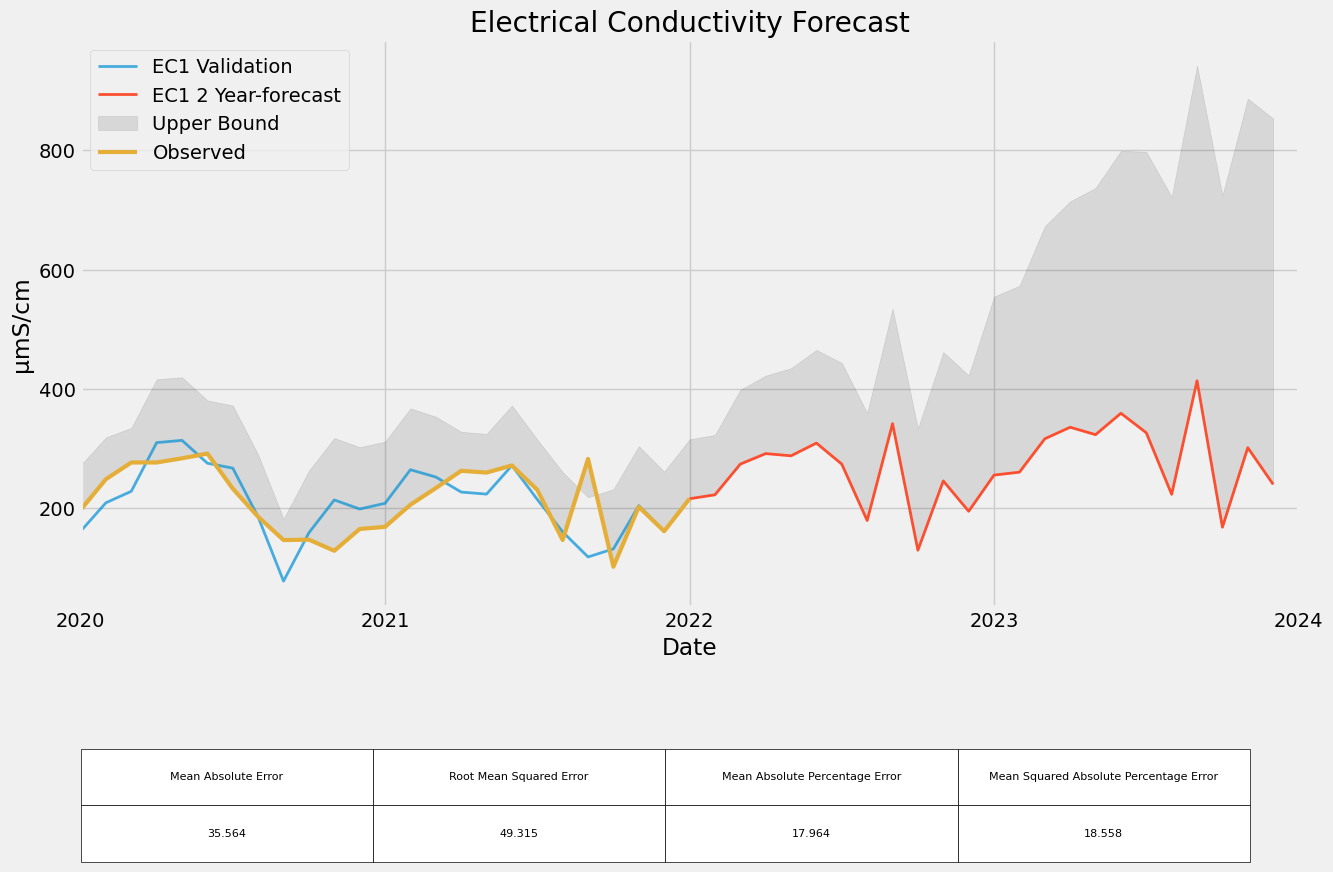

In [311]:
#Use to generate graphs for train all data
vartrain='EC'
spredict='2020-01-31'
startdate='2016'
train=df.loc[startdate:,vartrain].astype('float')
#print(modlist)
best=best_models[vartrain]
result=sm.tsa.statespace.SARIMAX(train,
                                order=best[0],
                                seasonal_order=best[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()
fig, ax=plt.subplots(figsize=(30,20),constrained_layout=False)

i=1
pred = result.get_prediction(start=pd.to_datetime(spredict), dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.plot(ax=ax, label=f'{vartrain}{i} Validation', alpha=.7, figsize=(14, 7),linewidth=2)
#ax.fill_between(pred_ci.index.,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
    
metrics= print_metrics(df[spredict:][vartrain],pred.predicted_mean,vartrain+str(i))
print(metrics)
table = ax.table(cellText=metrics.values, colWidths = [0.3]*len(metrics.columns),colLabels=metrics.columns, loc='bottom', rowLoc='center',cellLoc='center',  bbox=[0, -0.45, .96, 0.2], )    
table.set_fontsize(False)
table.set_fontsize(15)
fc= result.get_forecast(steps=24)
fc_ci=fc.conf_int()
fc.predicted_mean.plot(ax=ax, label=f'{vartrain}{i} 2 Year-forecast',linewidth=2)
forecastdf[vartrain]=pred.predicted_mean.append(fc.predicted_mean)
forecastudf[vartrain]=pred_ci.iloc[:,1].append(fc_ci.iloc[:, 1])
ax.fill_between(pred_ci.index.append(fc_ci.index),
                   df[vartrain][spredict:].append(fc.predicted_mean),
                    pred_ci.iloc[:,1].append(fc_ci.iloc[:, 1]), color='k', alpha=.1, label='Upper Bound')
        
df[vartrain][spredict:].append(fc.predicted_mean[0:1]).plot(ax=ax,label='Observed',linewidth=3)
ax.set_ylabel(units[vartrain])
ax.set_xlabel('Date')
ax.set_xlim(spredict,'2024-01-01')
ax.set_title(f'{trans[vartrain]} Forecast')
#print(pred.predicted_mean)
ax.legend(loc='upper left')
plt.show()

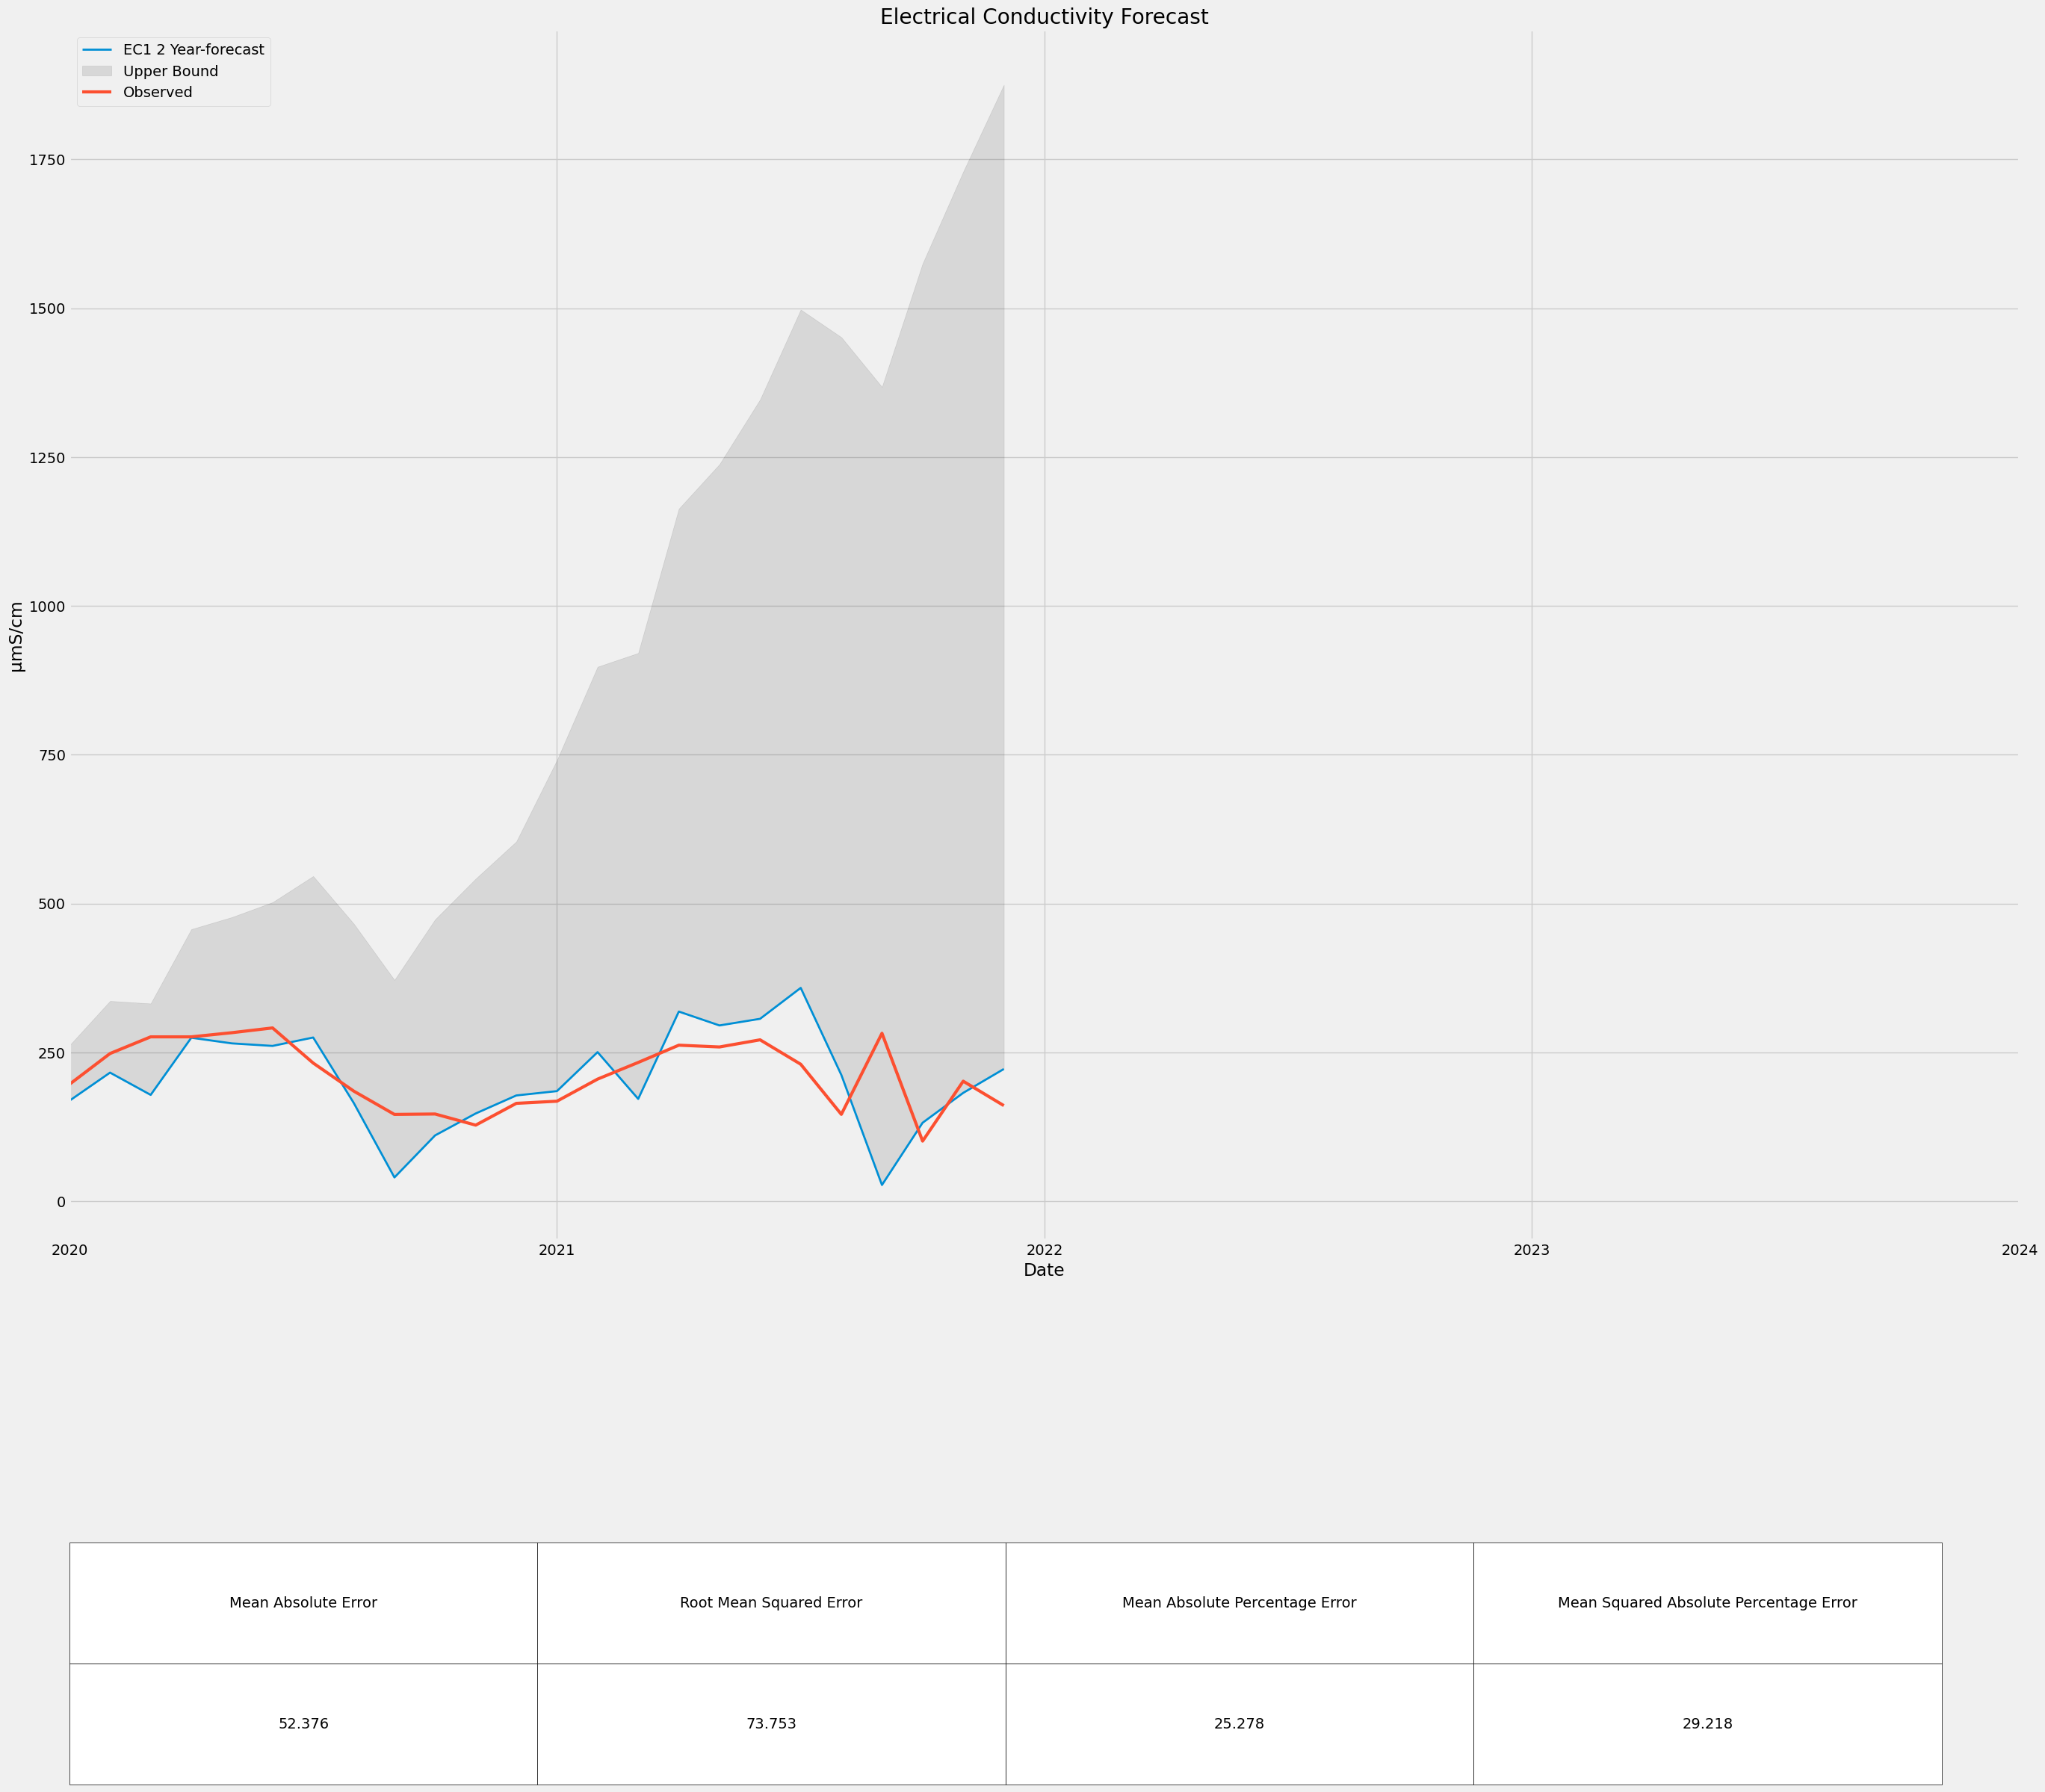

In [324]:
vartrain='EC'
spredict='2020-01-31'
epredict='2021-12-31'
startdate='2016'
enddate='2019'
train=df.loc[startdate:enddate,vartrain].astype('float')
#print(modlist)
best=best_models[vartrain]
result=sm.tsa.statespace.SARIMAX(train,
                                order=best[0],
                                seasonal_order=best[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()
fig, ax=plt.subplots(figsize=(30,20),constrained_layout=False)

i=1
#ax.fill_between(pred_ci.index.,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
    

fc= result.get_forecast(steps=24)
fc_ci=fc.conf_int()
fc.predicted_mean.plot(ax=ax, label=f'{vartrain}{i} 2 Year-forecast',linewidth=2)

metrics= print_metrics(df[spredict:][vartrain],fc.predicted_mean,vartrain+str(i))
table = ax.table(cellText=metrics.values, colWidths = [0.3]*len(metrics.columns),colLabels=metrics.columns, loc='bottom', rowLoc='center',cellLoc='center',  bbox=[0, -0.45, .96, 0.2], )    
forecastdf[vartrain]=fc.predicted_mean
forecastudf[vartrain]=fc_ci.iloc[:, 1]
ax.fill_between(fc_ci.index,
                   fc.predicted_mean,
                   fc_ci.iloc[:, 1], color='k', alpha=.1, label='Upper Bound')
        
df[vartrain][spredict:].plot(ax=ax,label='Observed',linewidth=3)
ax.set_ylabel(units[vartrain])
ax.set_xlabel('Date')
ax.set_xlim(spredict,'2024-01-01')
ax.set_title(f'{trans[vartrain]} Forecast')
#print(pred.predicted_mean)
ax.legend(loc='upper left')
plt.show()

In [315]:
forecastdf=pd.DataFrame(columns=df.columns)
forecastudf=pd.DataFrame(columns=df.columns)

In [288]:
forecastudf['WQI']=forecastudf.apply(calc_wqi,axis=1)
df['WQI']=df.apply(calc_wqi,axis=1)

      Mean Absolute Error  Root Mean Squared Error  \
WQI1                4.066                    4.609   

      Mean Absolute Percentage Error  Mean Squared Absolute Percentage Error  
WQI1                           8.553                                   8.657  


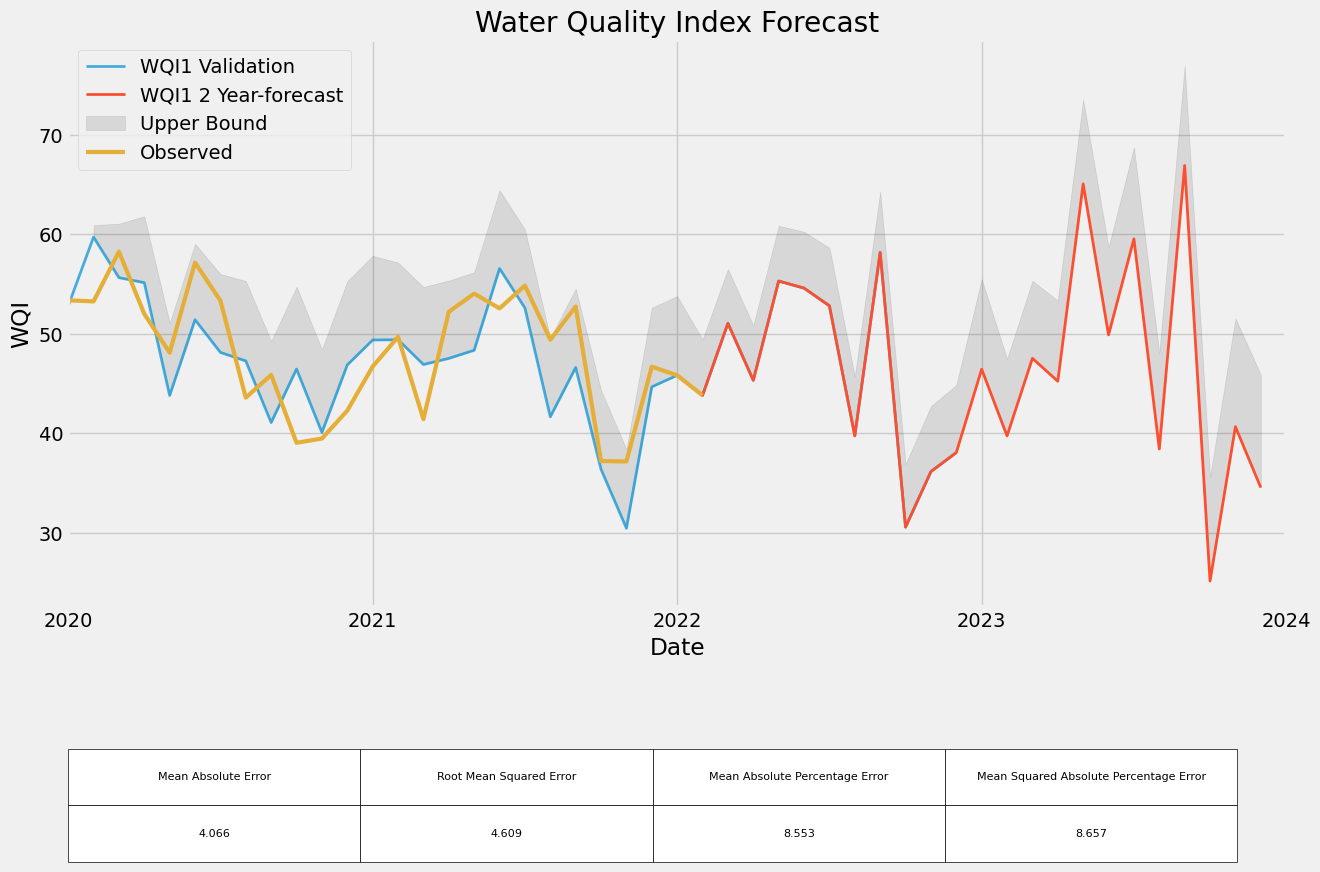

In [296]:
vartrain='WQI'
spredict='2020-01-31'
startdate='2016'
#train=df.loc[startdate:,vartrain].astype('float')
#print(modlist)
#best=best_models[vartrain]
#result=sm.tsa.statespace.SARIMAX(train,
#                                order=best[0],
#                                seasonal_order=best[1],
#                                enforce_stationarity=False,
#                                enforce_invertibility=False).fit()
fig, ax=plt.subplots(constrained_layout=False)

i=1
pred = forecastdf
pred_ci = forecastudf
pred[vartrain][:'2022'].plot(ax=ax, label=f'{vartrain}{i} Validation', alpha=.7, figsize=(14, 7),linewidth=2)
#ax.fill_between(pred_ci.index.,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
    
metrics= print_metrics(df[spredict:]['WQI'],pred[:'2021']['WQI'],vartrain+str(i))
print(metrics)
table = ax.table(cellText=metrics.values, colWidths = [0.3]*len(metrics.columns),colLabels=metrics.columns, loc='bottom', rowLoc='center',cellLoc='center',  bbox=[0, -0.45, .96, 0.2], )    
table.scale(3,2)  

pred['2022':]['WQI'].plot(ax=ax, label=f'{vartrain}{i} 2 Year-forecast',linewidth=2)
    
ax.fill_between(pred.index[1:],pred['WQI'][1:],pred_ci['WQI'][1:], color='k', alpha=.1, label='Upper Bound')
        
df[vartrain][spredict:].append(pred['2022-01':'2022-02']['WQI']).plot(ax=ax,label='Observed',linewidth=3)
ax.set_ylabel(units[vartrain])
ax.set_xlabel('Date')
ax.set_xlim(spredict,'2024-01-01')
ax.set_title(f'{trans[vartrain]} Forecast')
#print(pred.predicted_mean)
ax.legend(loc='upper left')
plt.show()

In [ ]:
vartrain='WQI'
spredict='2020-01-31'
startdate='2016'
#train=df.loc[startdate:,vartrain].astype('float')
#print(modlist)
#best=best_models[vartrain]
#result=sm.tsa.statespace.SARIMAX(train,
#                                order=best[0],
#                                seasonal_order=best[1],
#                                enforce_stationarity=False,
#                                enforce_invertibility=False).fit()
fig, ax=plt.subplots(constrained_layout=False)

i=1
pred = forecastdf
pred_ci = forecastudf
pred[vartrain][:'2022'].plot(ax=ax, label=f'{vartrain}{i} Validation', alpha=.7, figsize=(14, 7),linewidth=2)
#ax.fill_between(pred_ci.index.,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
    
metrics= print_metrics(df[spredict:]['WQI'],pred[:'2021']['WQI'],vartrain+str(i))
print(metrics)
table = ax.table(cellText=metrics.values, colWidths = [0.3]*len(metrics.columns),colLabels=metrics.columns, loc='bottom', rowLoc='center',cellLoc='center',  bbox=[0, -0.45, .96, 0.2], )    
table.scale(3,2)  

pred['2022':]['WQI'].plot(ax=ax, label=f'{vartrain}{i} 2 Year-forecast',linewidth=2)
    
ax.fill_between(pred.index[1:],pred['WQI'][1:],pred_ci['WQI'][1:], color='k', alpha=.1, label='Upper Bound')
        
df[vartrain][spredict:].append(pred['2022-01':'2022-02']['WQI']).plot(ax=ax,label='Observed',linewidth=3)
ax.set_ylabel(units[vartrain])
ax.set_xlabel('Date')
ax.set_xlim(spredict,'2024-01-01')
ax.set_title(f'{trans[vartrain]} Forecast')
#print(pred.predicted_mean)
ax.legend(loc='upper left')
plt.show()

In [179]:
df['']

COD    DO          EC    NO3     N2   TSS       TEMP        PH
Date                                                                       
2003-01-31  2.94  5.78  131.195447  0.141  0.456  43.0  30.000049  7.241053
2003-02-28  1.82  6.61  149.295438  0.092  0.780  38.0  28.999728  7.081055
2003-03-31  1.68  7.19  174.595427  0.072  0.289  34.0  28.999728  7.191054
2003-04-30  1.71  6.98  172.995428  0.150  0.517  26.8  30.000049  7.551047
2003-05-31  2.30  7.02  241.995397  0.240  0.669  10.4  29.699952  6.701062
...          ...   ...         ...    ...    ...   ...        ...       ...
2021-08-31  3.81  5.24  145.795440  0.648  1.160  15.0  29.199792  7.201053
2021-09-30  4.09  4.47  281.995379  0.757  3.110  42.0  28.799663  6.961058
2021-10-31  3.50  5.50  100.895460  0.043  0.605  76.0  28.199471  6.571064
2021-11-30  3.37  5.29  201.495415  0.232  0.713  56.0  29.799985  6.471066
2021-12-31  4.10  5.08  160.495433  0.523  0.706  38.0  29.099760  7.031056

[228 rows x 8 columns]

In [130]:
pd.Series(mdict['EC'])[range(2,5)]

2    ((0, 2, 2), (0, 2, 2, 12), 222.94364387754553)
3    ((1, 2, 2), (0, 2, 2, 12), 223.20608994385657)
4    ((0, 2, 2), (1, 2, 2, 12), 226.51692322024502)
dtype: object

In [148]:
modells=dict(zip(df.columns,[0,1,3,3,9,23,2,1]))
modells

{'COD': 0, 'DO': 1, 'EC': 3, 'NO3': 3, 'N2': 9, 'TSS': 23, 'TEMP': 2, 'PH': 1}

In [149]:
forecastdf= pd.DataFrame(columns=df.columns)

In [153]:
for k,v in modells.items():
    best=mdict[k][v]
    result=sm.tsa.statespace.SARIMAX(train,
                                order=best[0],
                                seasonal_order=best[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()
    forecastdf[k]=result.forecast(steps=36)

In [160]:
forecastdf['WQI']=forecastdf.apply(calc_wqi,axis=1)

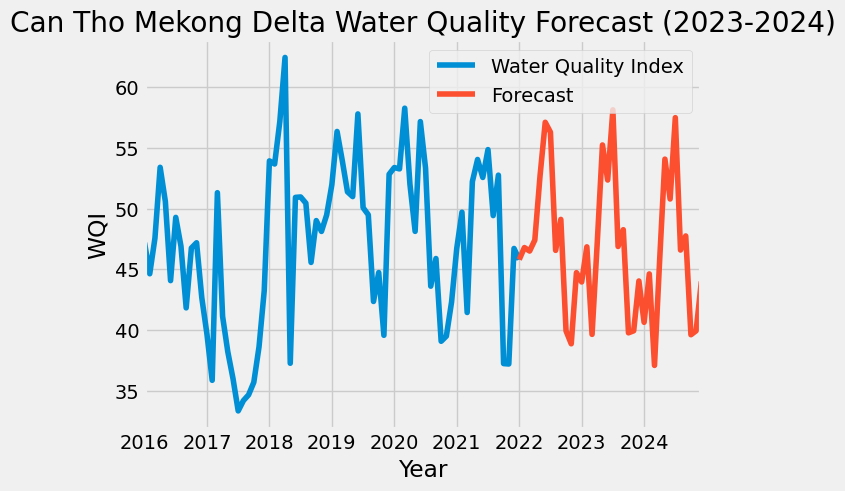

In [168]:
fig, ax= plt.subplots()
ax.set_title('Can Tho Mekong Delta Water Quality Forecast (2023-2024)')
ax.set_ylabel('WQI')
ax.set_xlabel('Year')
ax= df['WQI']['2016':].append(forecastdf['WQI'][0:1]).plot(label='Water Quality Index')
forecastdf['WQI'].plot(ax=ax, label='Forecast')
ax.legend()